In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
delitos = pd.read_csv('../../data/clean/DelitosTipo1/DelitosTipo1-2010-2020_deltas_mensuales(interpolado).csv')
desempleo = pd.read_csv('../../data/clean/Tasa de Desempleos/tasa_de_desempleos_y_mas_limpio.csv')

In [3]:
# Delete unnecesary column
del delitos["Unnamed: 0"]

# Rename column so it has the same name on both dfs
delitos.rename(columns = {'Distrito':'Municipio'}, inplace = True)

# # Hay que tener el mismo range de datos en ambos dfs, desde 2010 hasta 2020
delitos.drop(delitos[(delitos['Date'] > '2020-09')].index, inplace=True)

delitos

Municipio  Tipo I  Ases.  Viol.  Robo  Agr. Grave  Esc.  Apr. I  H. Auto  \
0     Adjuntas    34.0    0.0    0.0   4.0         1.0  12.0    16.0      1.0   
1        Ponce   243.0    4.0    0.0  26.0        14.0  52.0   123.0     24.0   
2     Peñuelas    12.0    0.0    0.0   2.0         0.0   6.0     2.0      2.0   
3     Patillas    13.0    0.0    0.0   0.0         4.0   6.0     3.0      0.0   
4     Orocovis    22.0    0.0    0.0   0.0         0.0  10.0    12.0      0.0   
...        ...     ...    ...    ...   ...         ...   ...     ...      ...   
9979  Orocovis     3.0    0.0    0.0   0.0         1.0   2.0     0.0      0.0   
9980  Patillas     8.0    0.0    0.0   0.0         6.0   0.0     2.0      0.0   
9981  Peñuelas     6.0    0.0    0.0   1.0         1.0   1.0     3.0      0.0   
9982     Ponce    54.0    1.0    1.0   3.0        16.0   3.0    29.0      1.0   
9983      Moca    10.0    0.0    0.0   0.0         2.0   2.0     5.0      1.0   

            Date  
0     2010-01-01  
1     2010-01-01  
2     2010-01-01  
3     2010-01-01  
4     2010-01-01  
...          ...  
9979  2020-08-01  
9980  2020-08-01  
9981  2020-08-01  
9982  2020-08-01  
9983  2020-08-01  

[9984 rows x 10 columns]

In [4]:
# Cambiar el nombre de la columna de los municipios
desempleo.rename(columns = {'Municipio o Area':'Municipio'}, inplace = True)
desempleo

Date                         Municipio  Tasa de Desempleo  \
0      2020-08-01                    Puerto Rico SA                8.3   
1      2020-07-01                    Puerto Rico SA                8.5   
2      2020-06-01                    Puerto Rico SA                8.9   
3      2020-05-01                    Puerto Rico SA                9.0   
4      2020-02-01                    Puerto Rico SA                8.5   
...           ...                               ...                ...   
22700  2000-12-01  San Juan-Carolina-Caguas, PR MSA                9.0   
22701  2000-11-01  San Juan-Carolina-Caguas, PR MSA                8.6   
22702  2000-10-01  San Juan-Carolina-Caguas, PR MSA                9.9   
22703  2000-09-01  San Juan-Carolina-Caguas, PR MSA                8.8   
22704  2000-08-01  San Juan-Carolina-Caguas, PR MSA                9.1   

       Num. Personas Desempleadas  Num. Personas Empleadas  \
0                         86123.0                 951707.0   
1                         87804.0                 946949.0   
2                         92311.0                 942830.0   
3                         93122.0                 939024.0   
4                         92713.0                 975464.0   
...                           ...                      ...   
22700                     67176.0                 758365.0   
22701                     66478.0                 765566.0   
22702                     75071.0                 756275.0   
22703                     71936.0                 780914.0   
22704                     83476.0                 782071.0   

       Num. Personas Grupo Trabajador  
0                           1037830.0  
1                           1034753.0  
2                           1035141.0  
3                           1032146.0  
4                           1048791.0  
...                               ...  
22700                        845088.0  
22701                        838129.0  
22702                        833436.0  
22703                        837502.0  
22704                        839751.0  

[22705 rows x 6 columns]

In [5]:
# Converting to datetime before doing the merge for
# the most appropriate format.
desempleo['Date'] = pd.to_datetime(desempleo['Date'])
delitos['Date'] = pd.to_datetime(delitos['Date'])

* Nota:
Tras analizar la data, nos dimos cuenta de que hay municipios que se repiten. Por ejemplo, para Mayagüez en enero-2010, hay una taza de desempleo de 16.9. Sin embargo, hay otro valor que se llama "Mayagüez, PR" que tiene otra taza de desempleo diferente de 17.6. Lo que trato de decir es que el mismo municipio está escrito con el mismo nombre y con valores distintos. Por eso se tomo la desición de eliminar aquellos que contenian el (", PR") en su nombre.

In [6]:
# Crear un df que haga match del municipio y el date con el resto de las columnas
df = pd.merge(desempleo, delitos, on=['Date', 'Municipio'])
# df["Municipio"].unique()
# df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df.dtypes

Date                              datetime64[ns]
Municipio                                 object
Tasa de Desempleo                        float64
Num. Personas Desempleadas               float64
Num. Personas Empleadas                  float64
Num. Personas Grupo Trabajador           float64
Tipo I                                   float64
Ases.                                    float64
Viol.                                    float64
Robo                                     float64
Agr. Grave                               float64
Esc.                                     float64
Apr. I                                   float64
H. Auto                                  float64
dtype: object

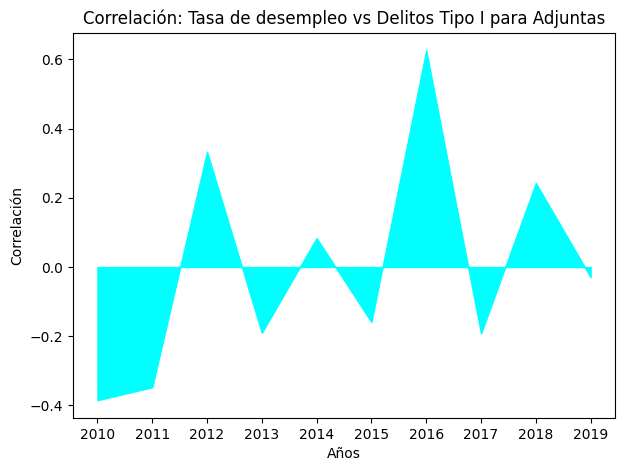

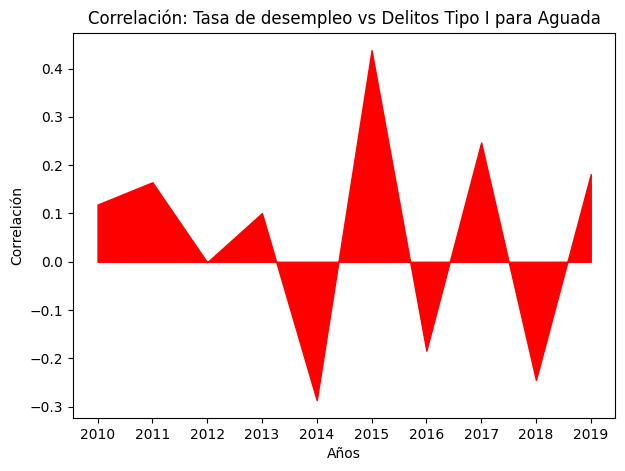

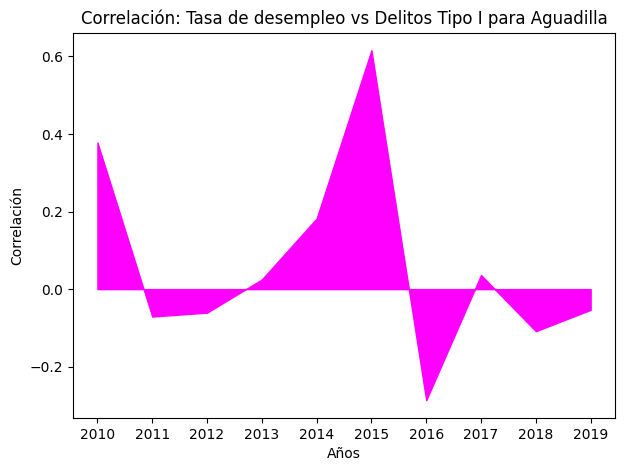

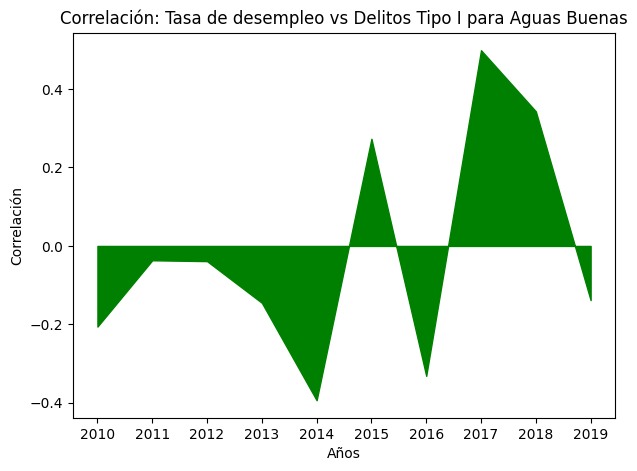

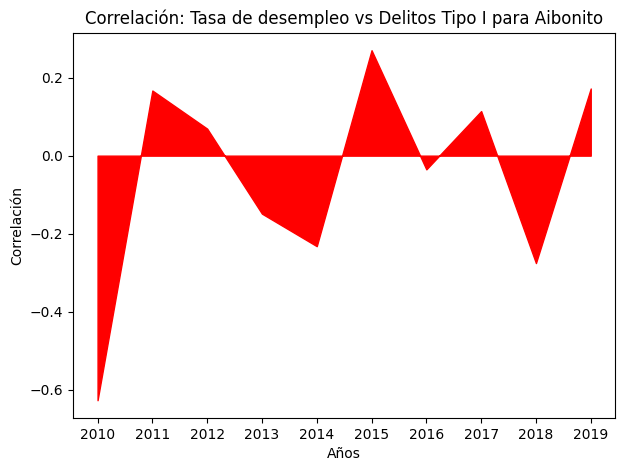

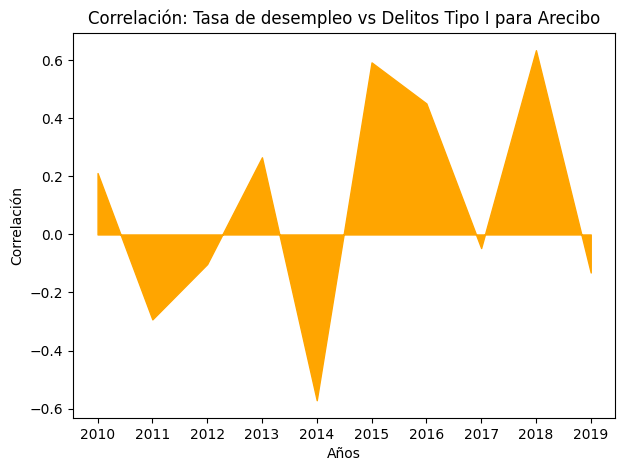

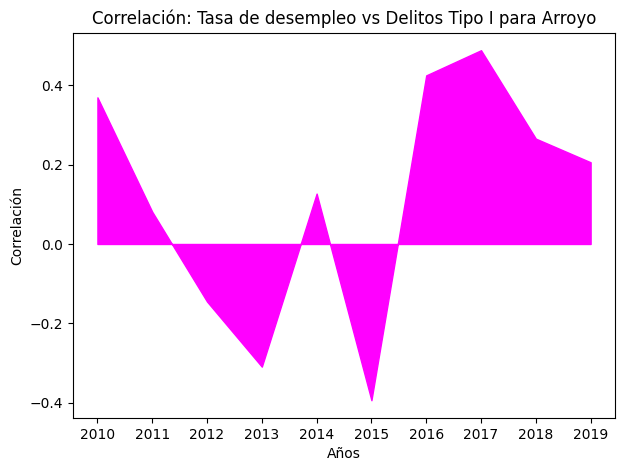

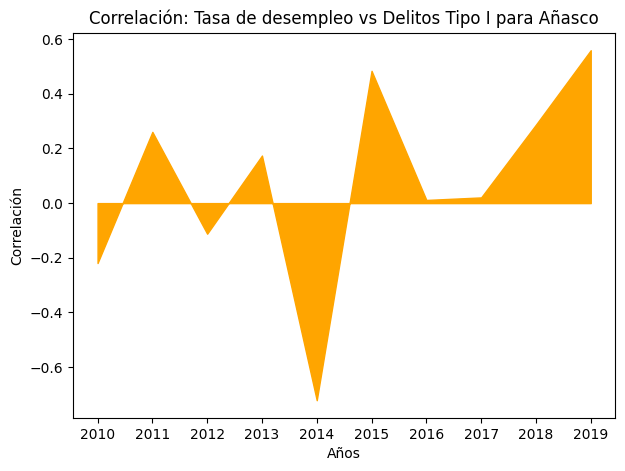

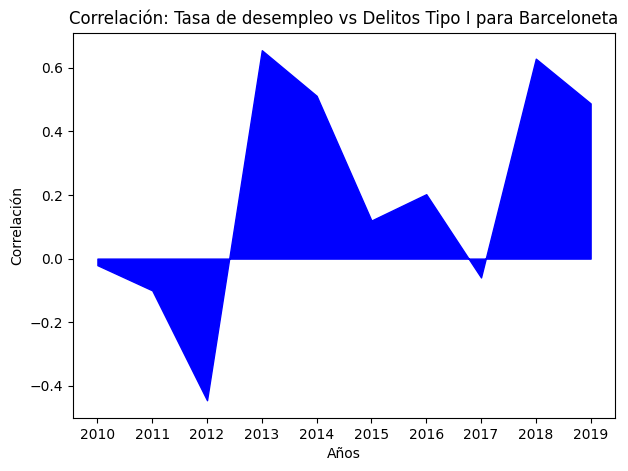

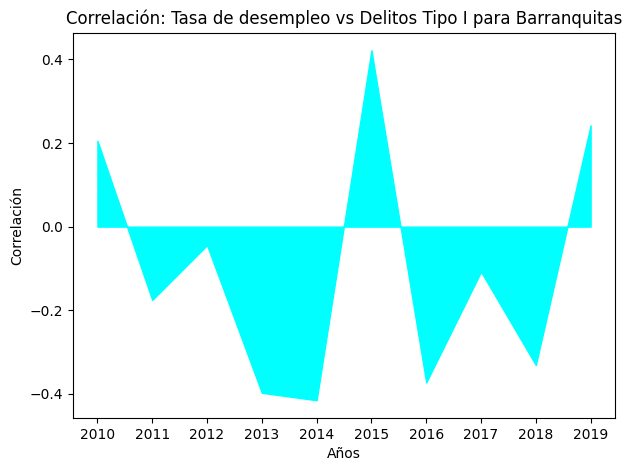

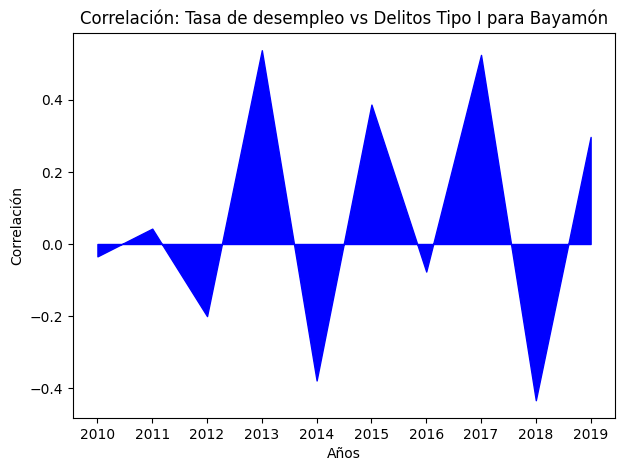

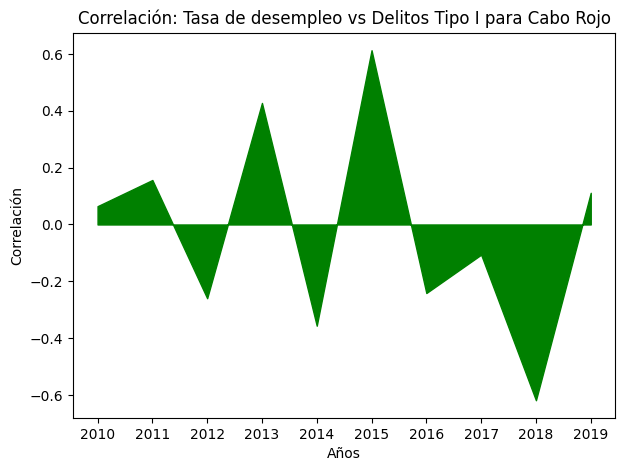

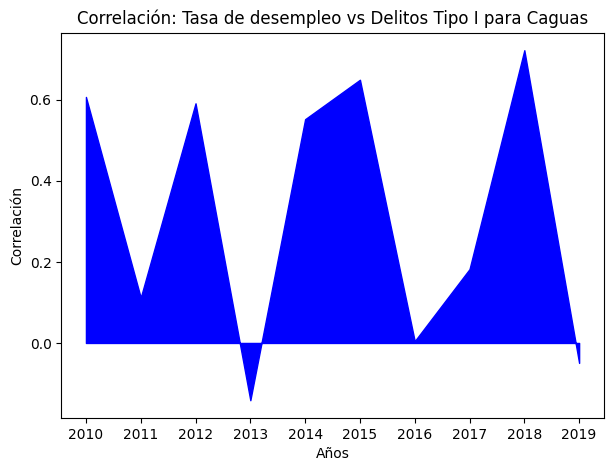

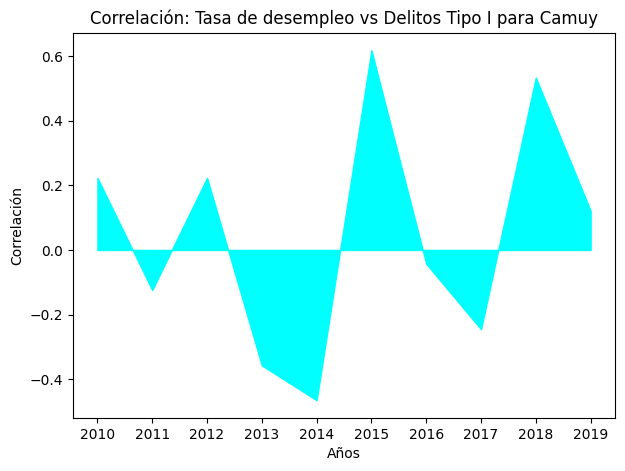

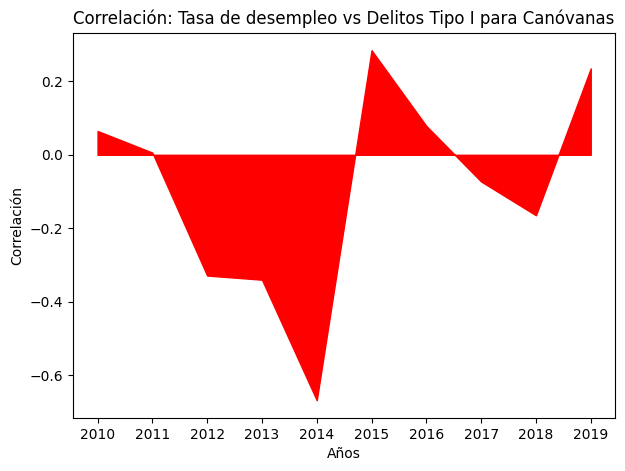

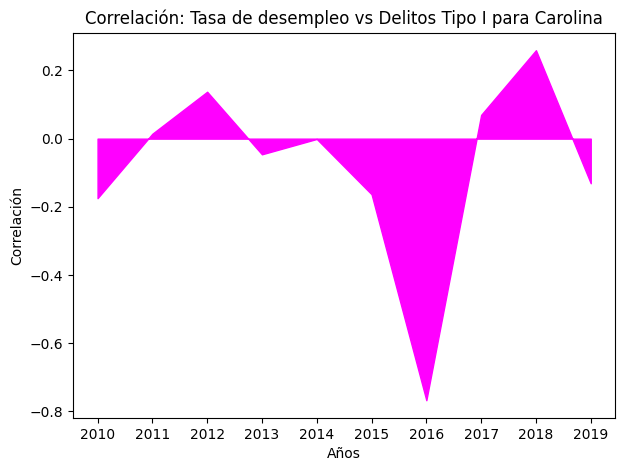

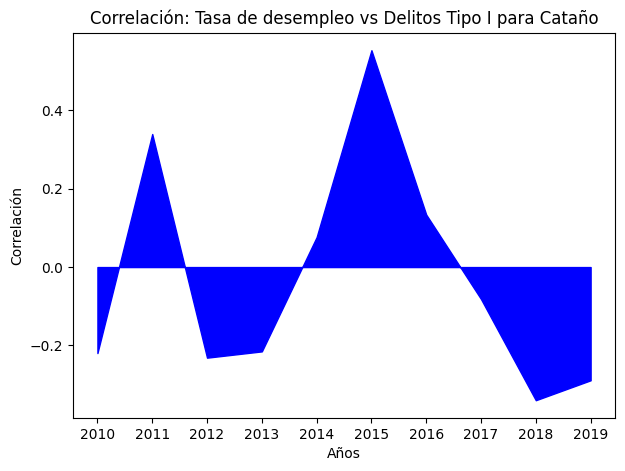

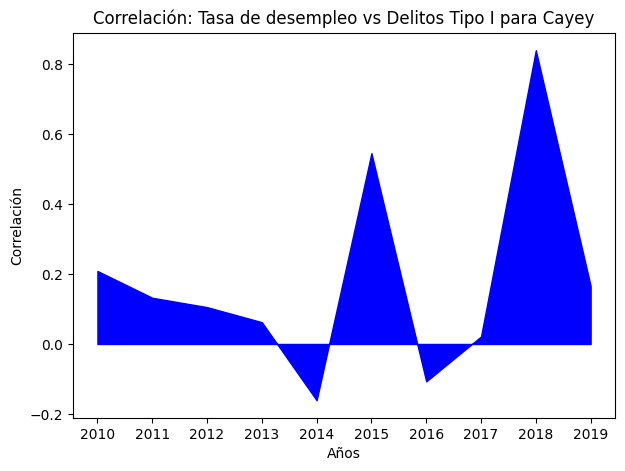

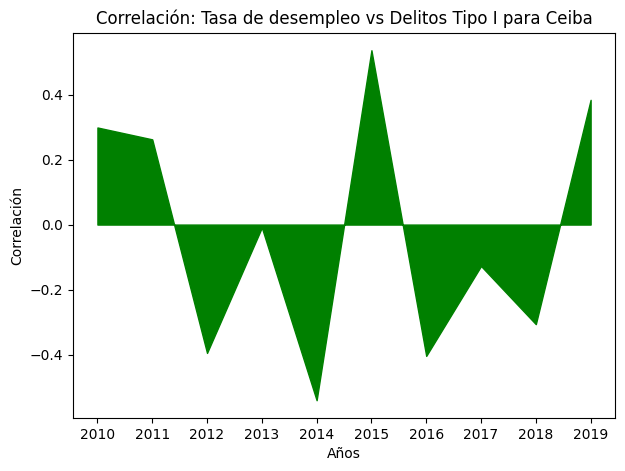

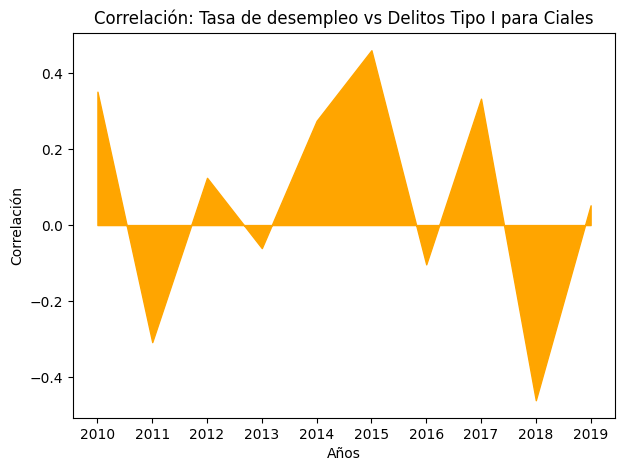

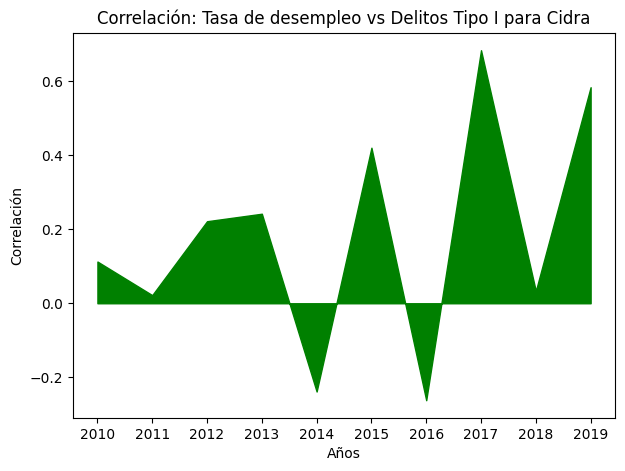

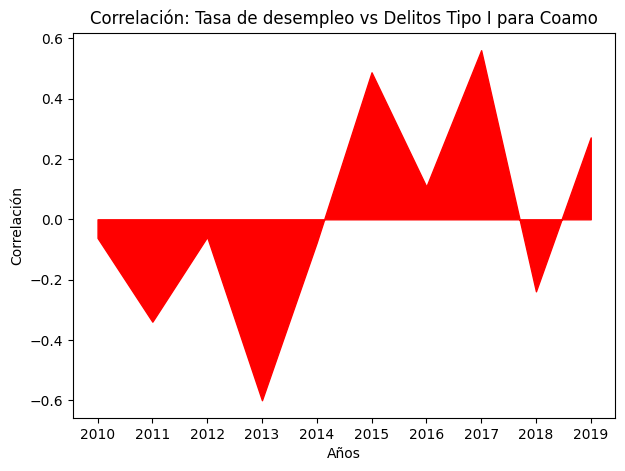

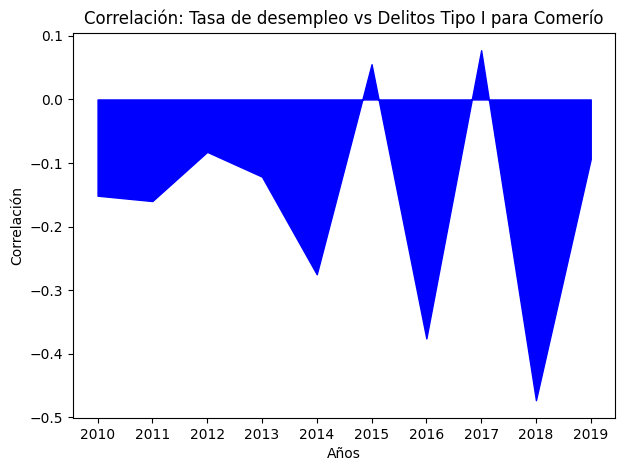

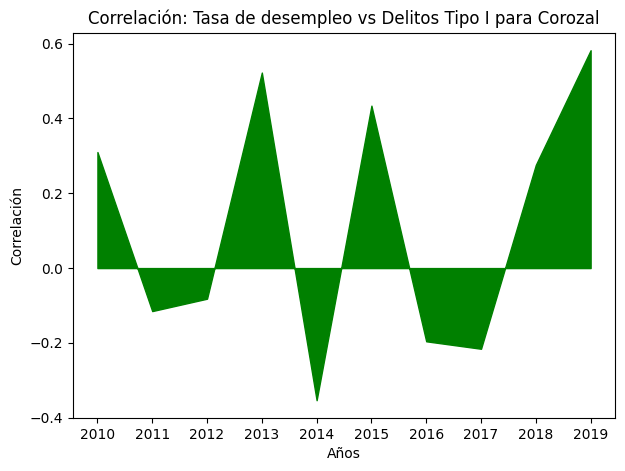

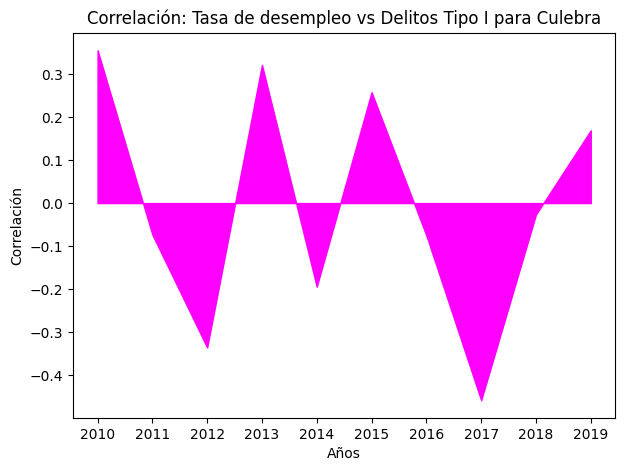

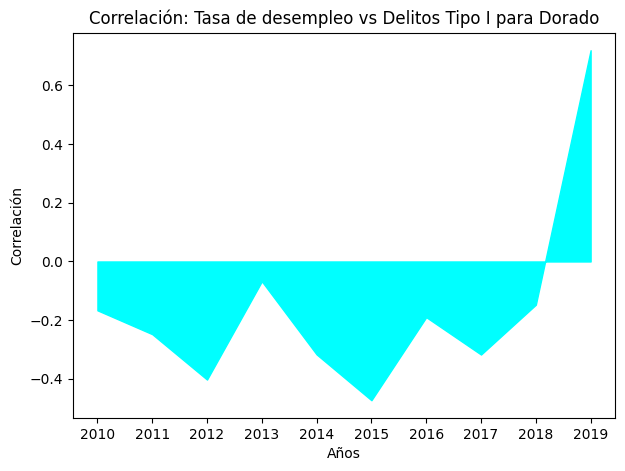

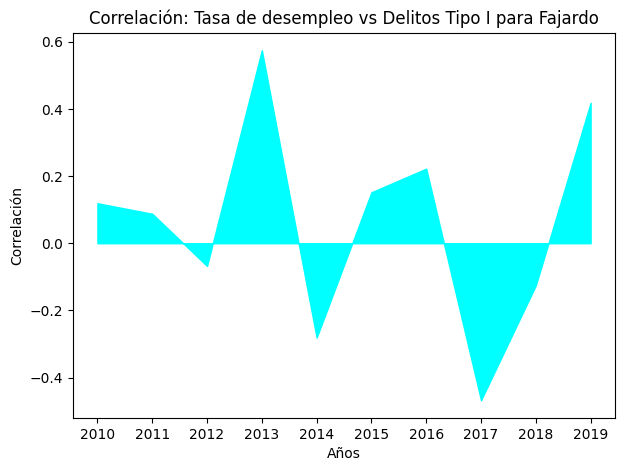

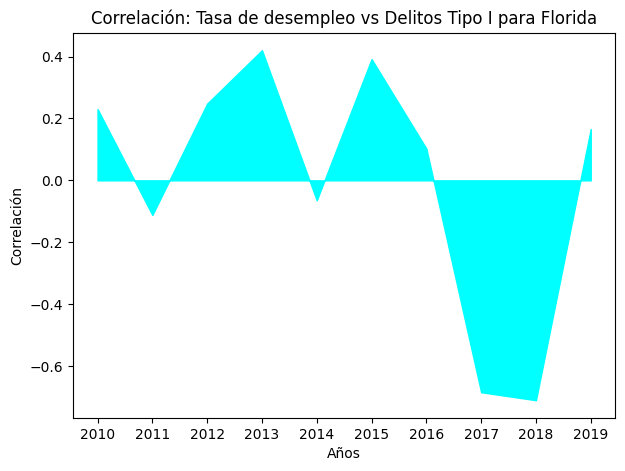

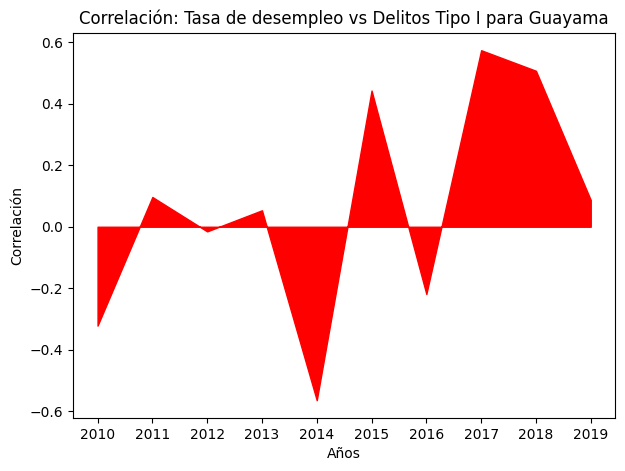

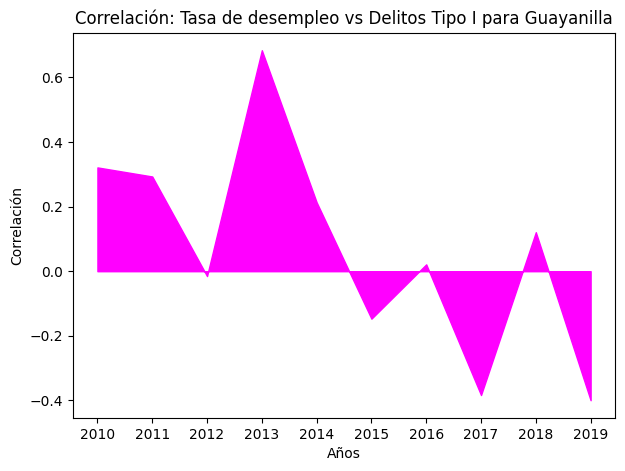

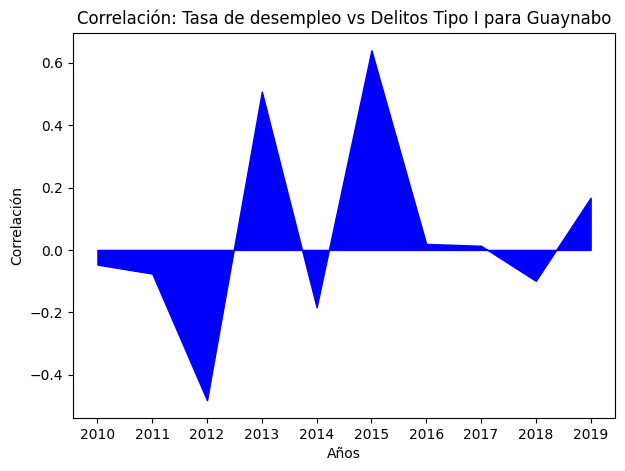

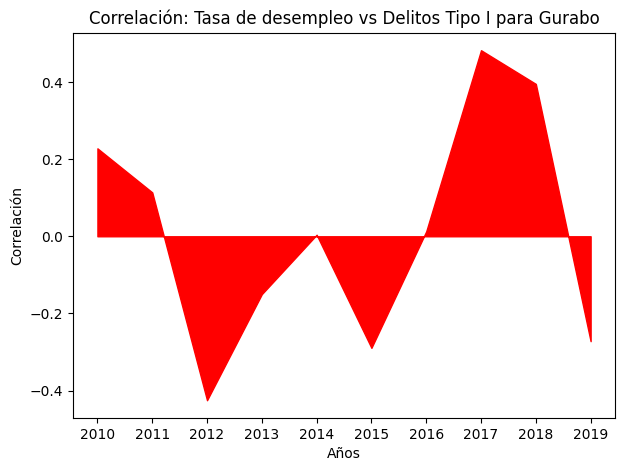

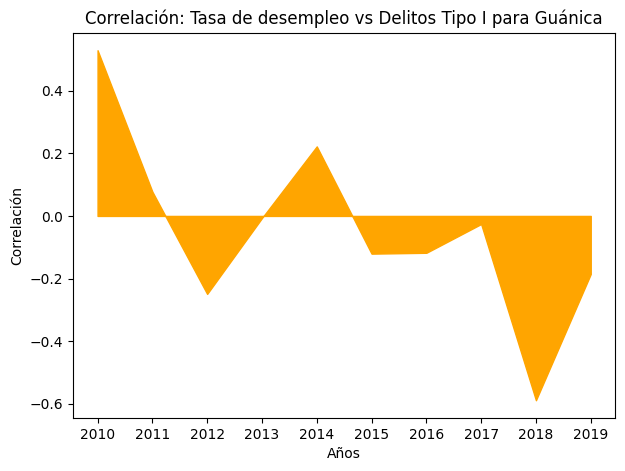

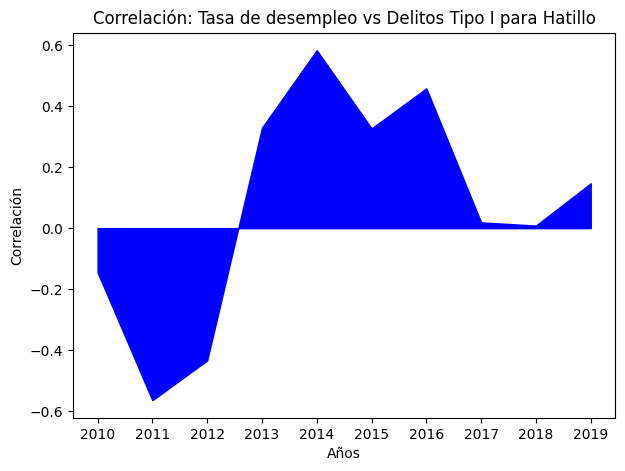

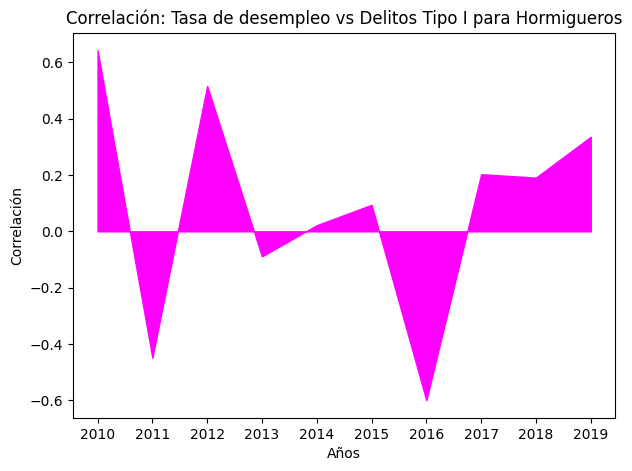

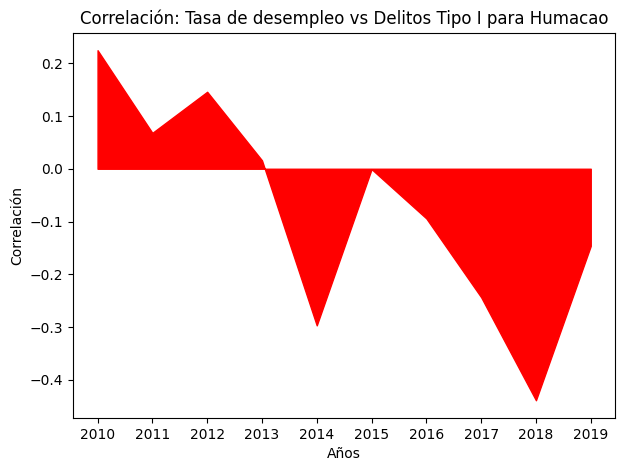

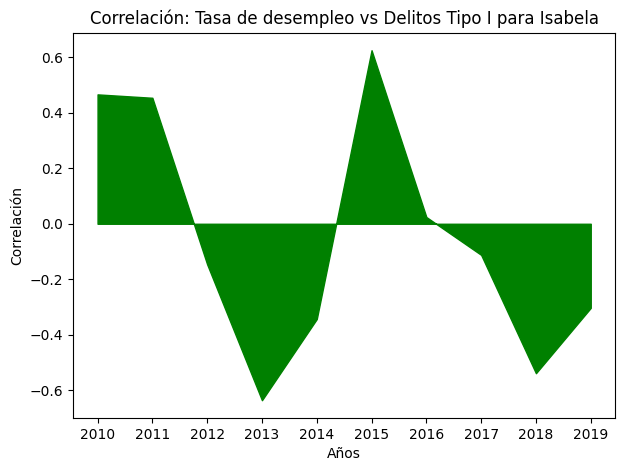

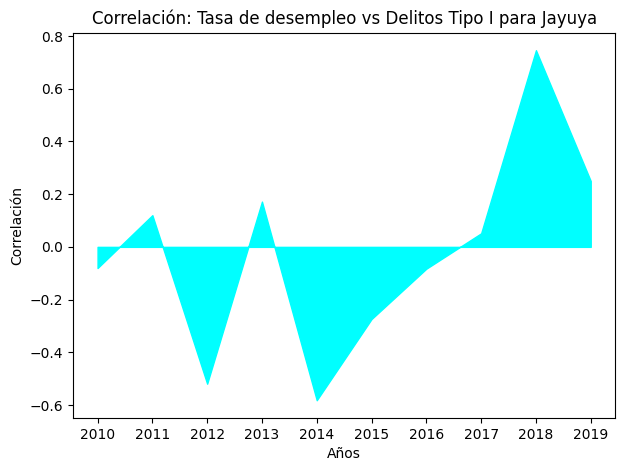

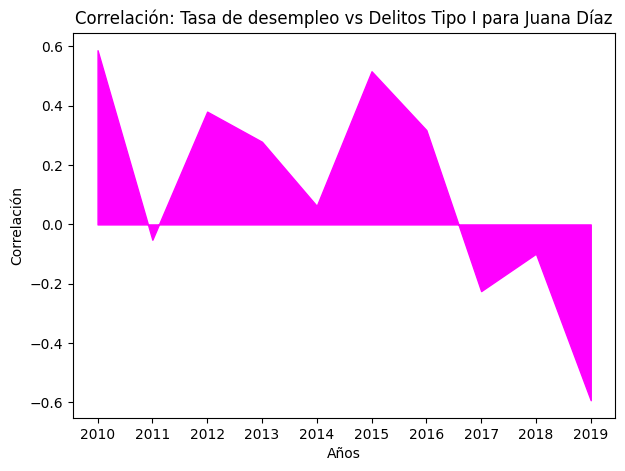

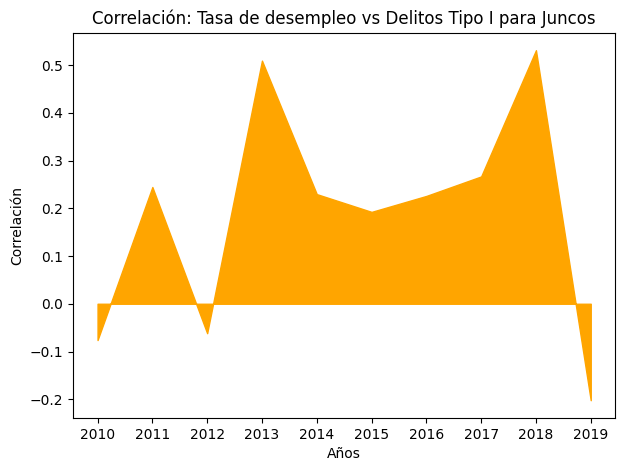

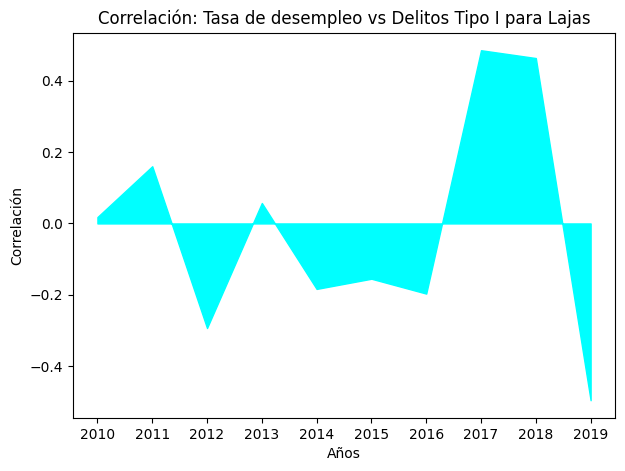

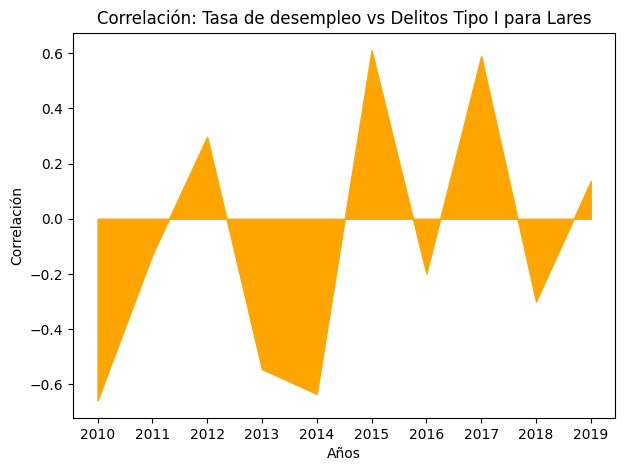

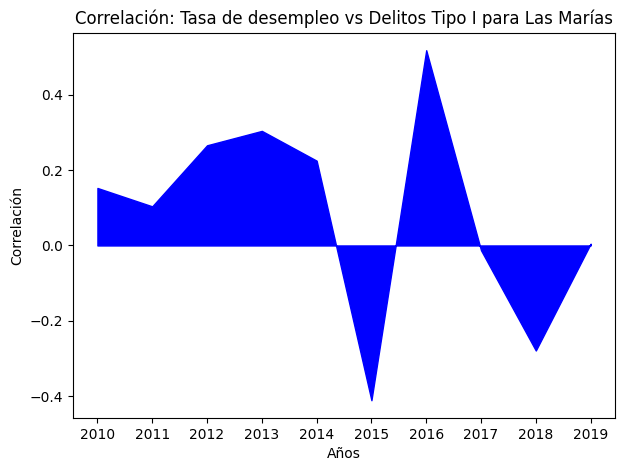

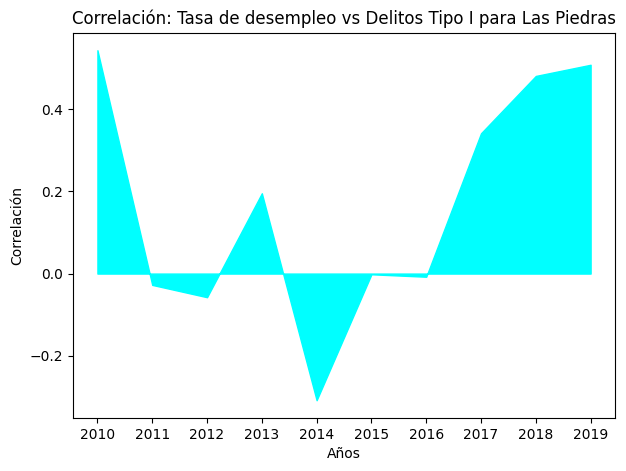

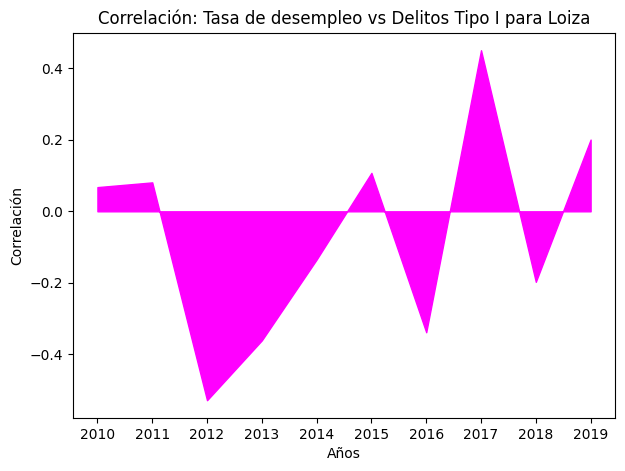

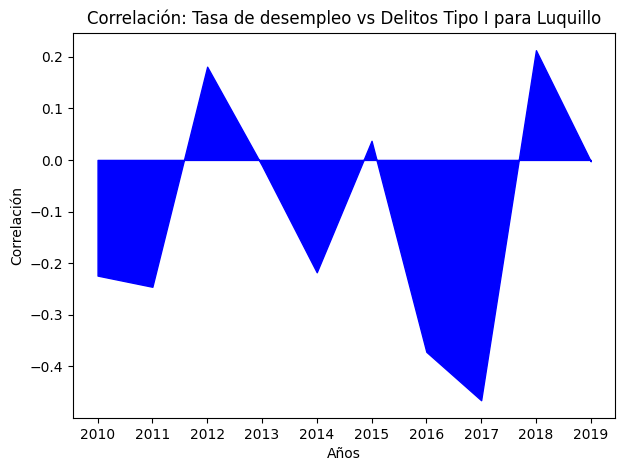

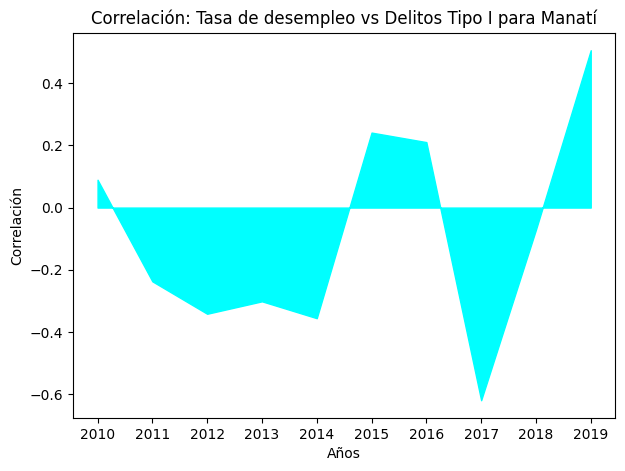

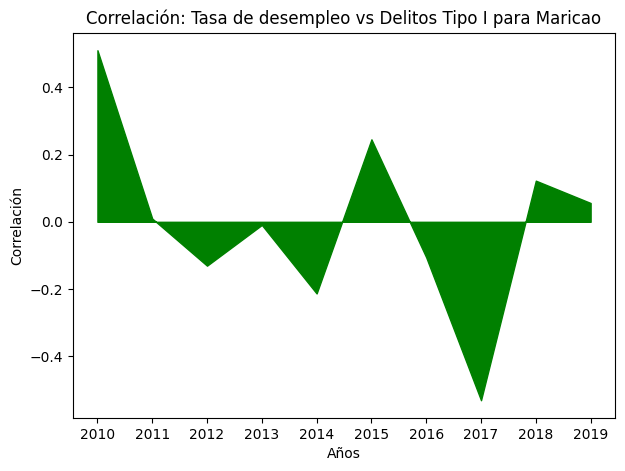

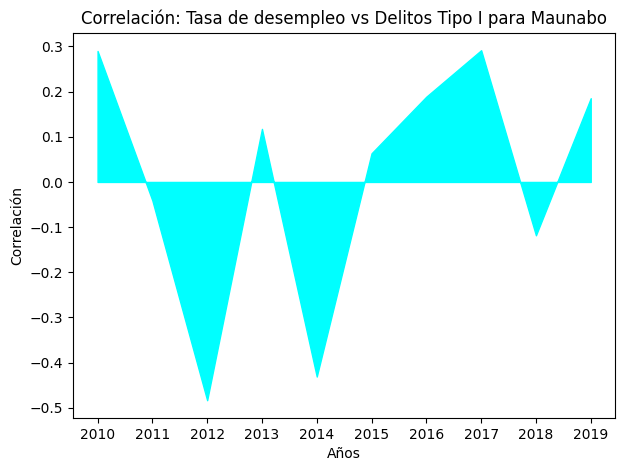

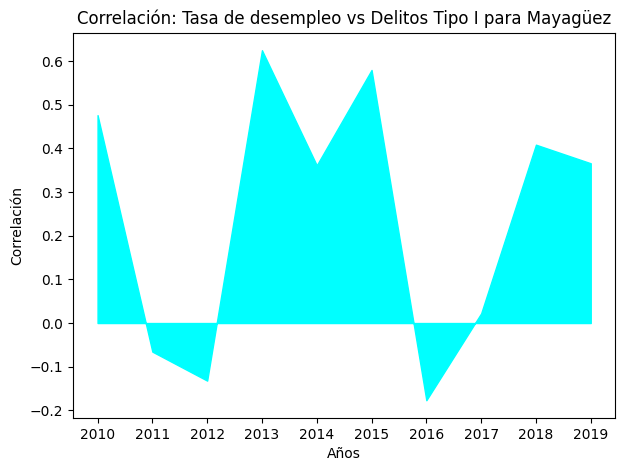

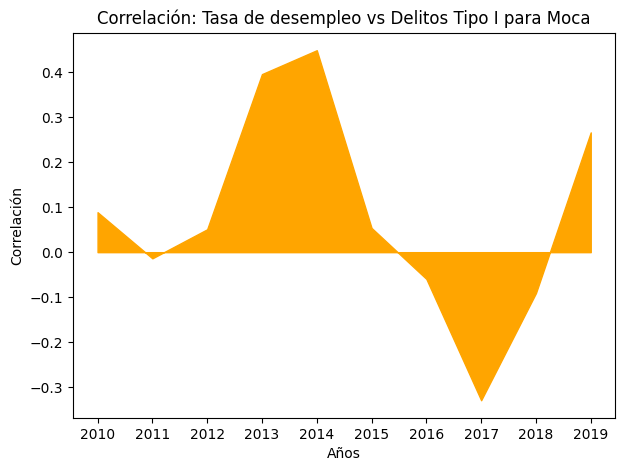

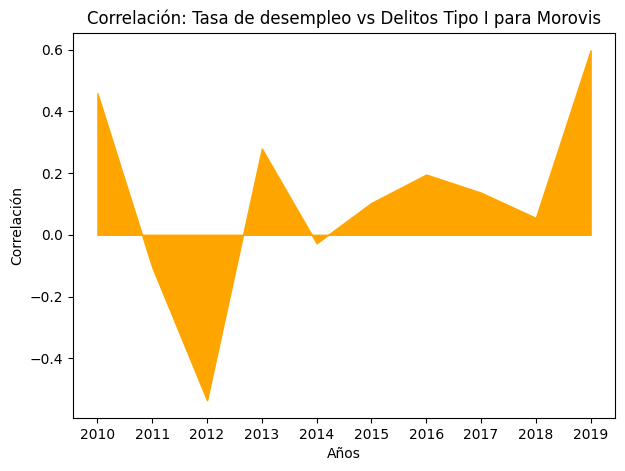

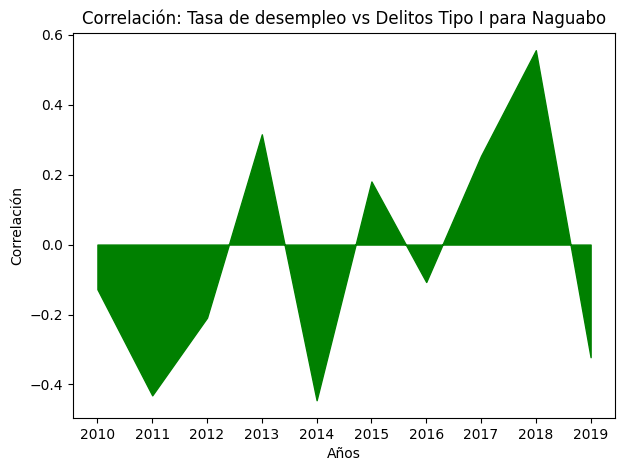

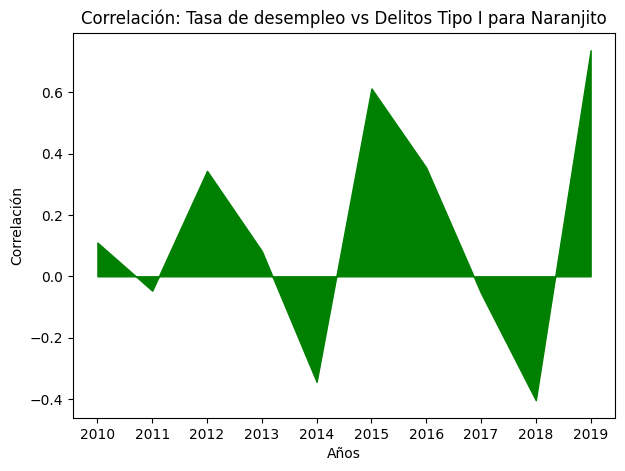

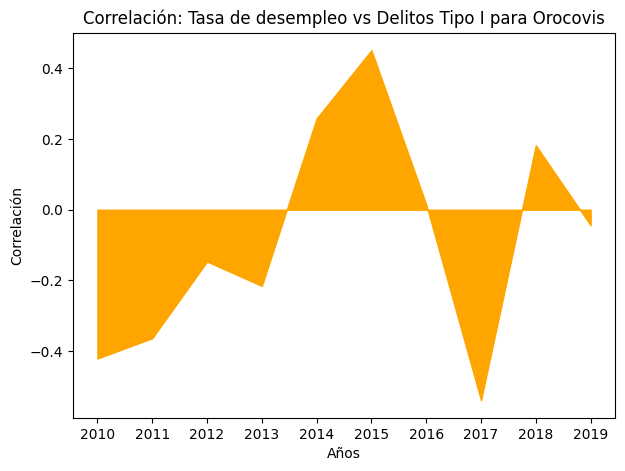

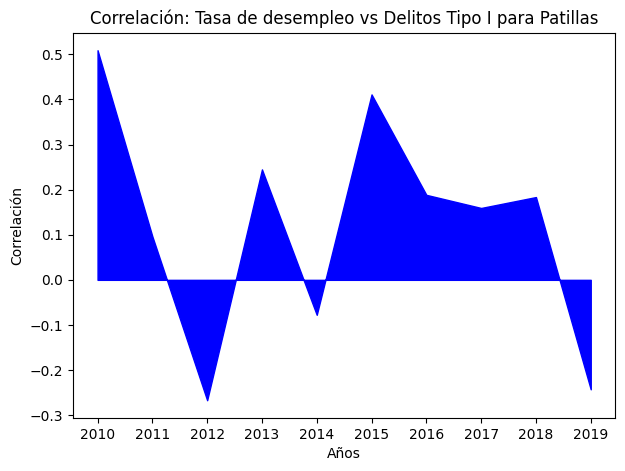

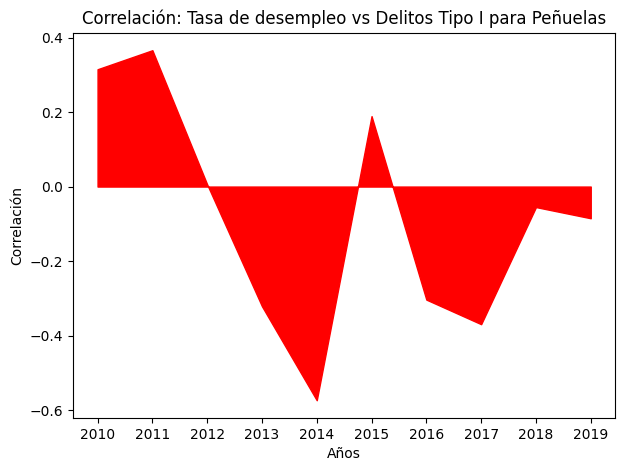

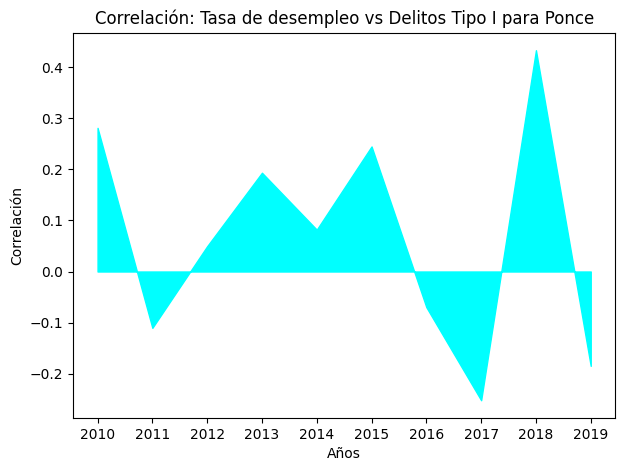

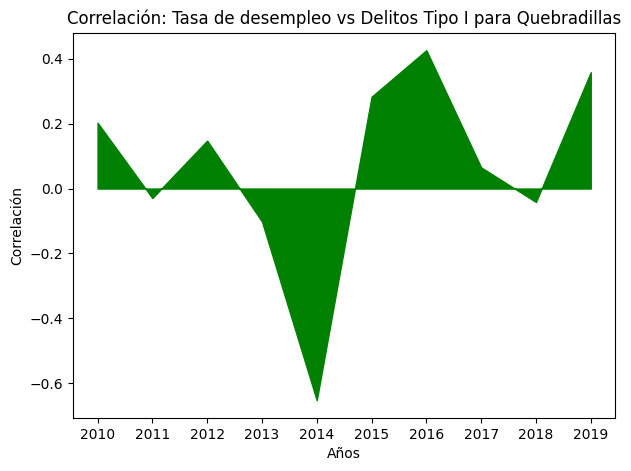

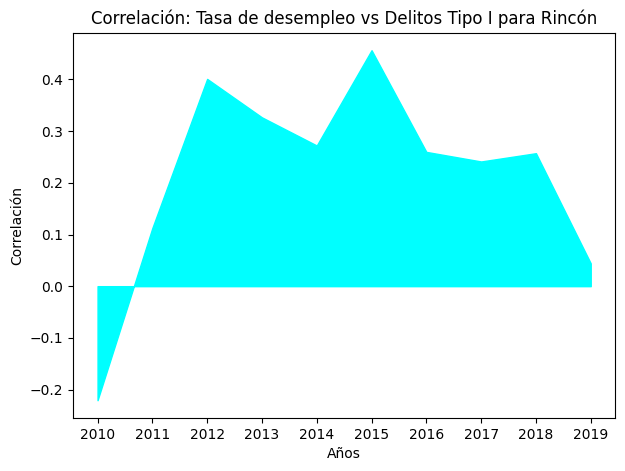

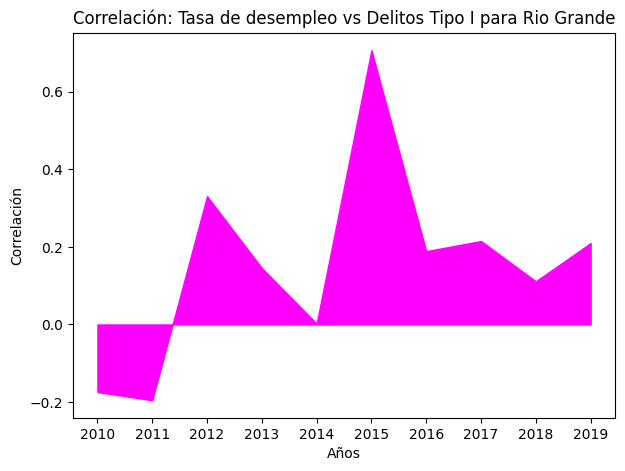

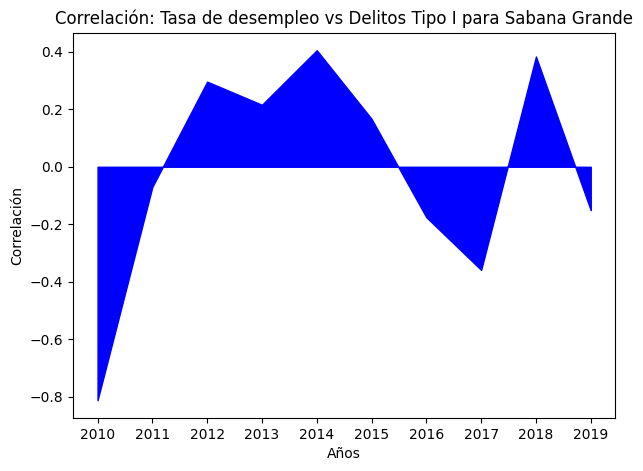

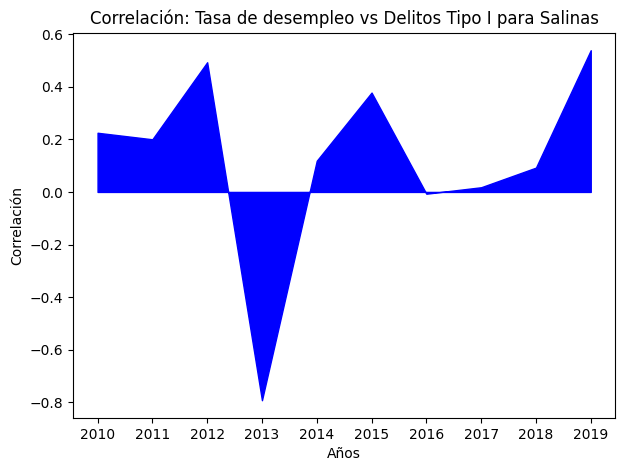

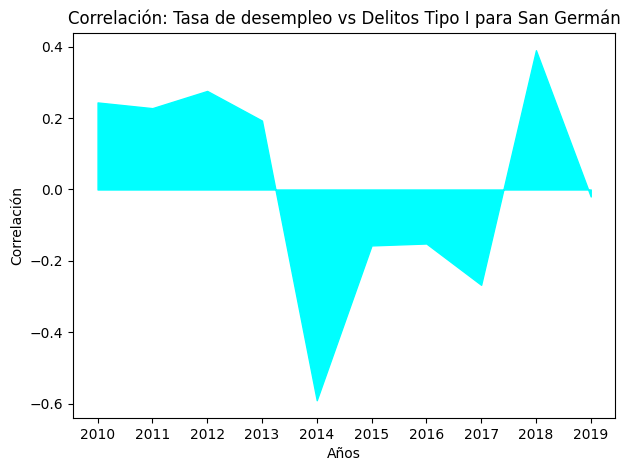

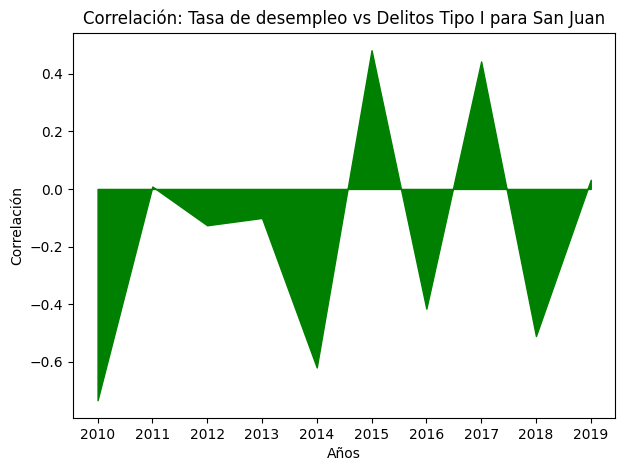

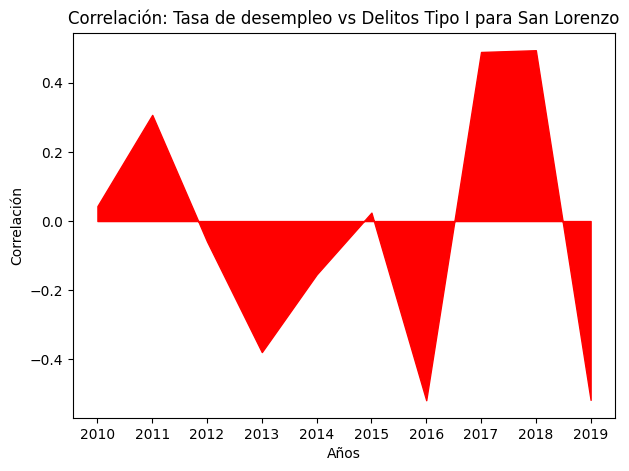

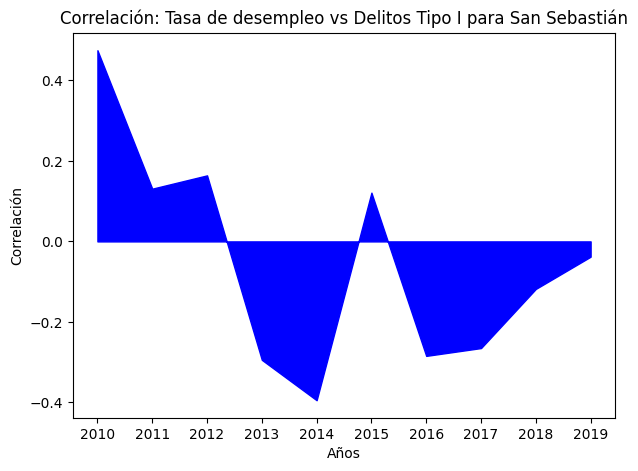

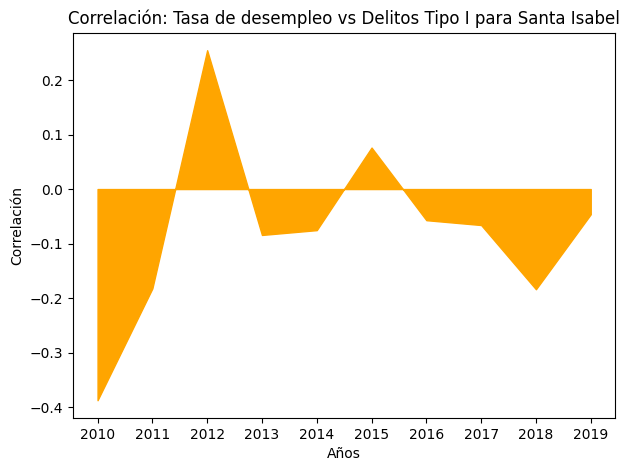

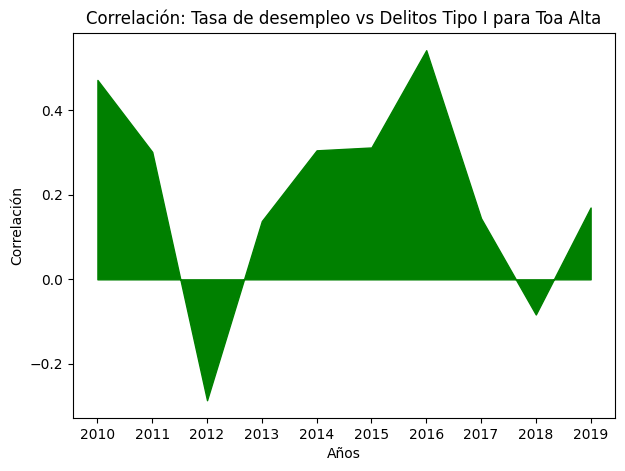

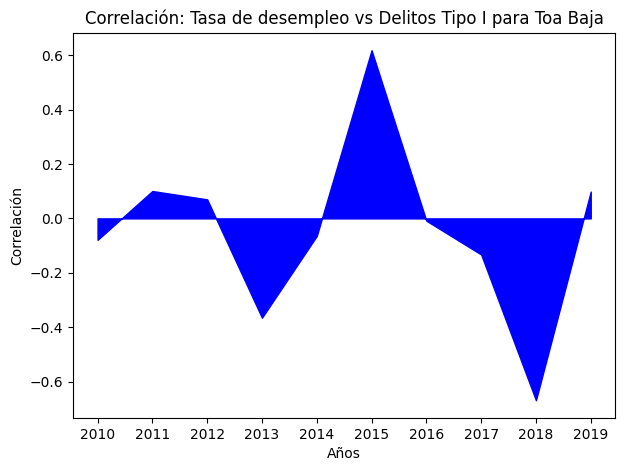

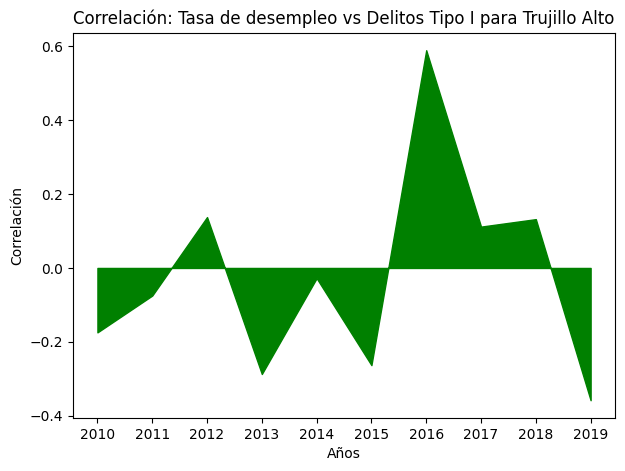

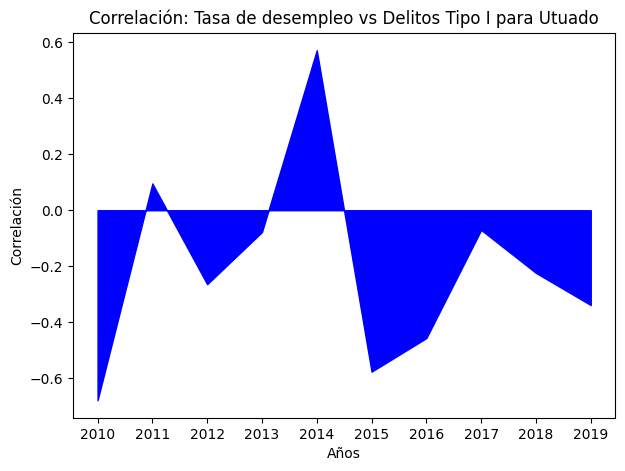

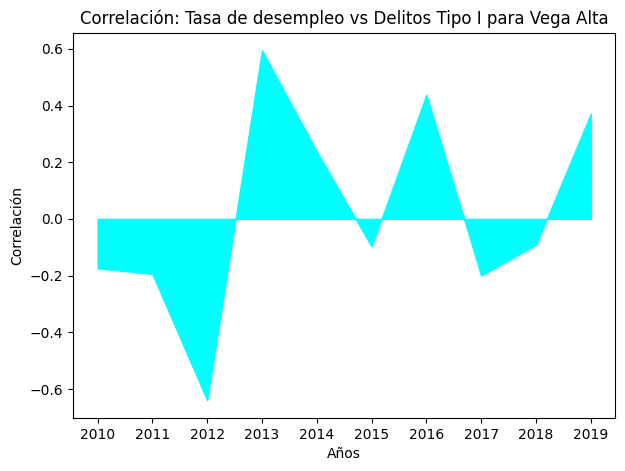

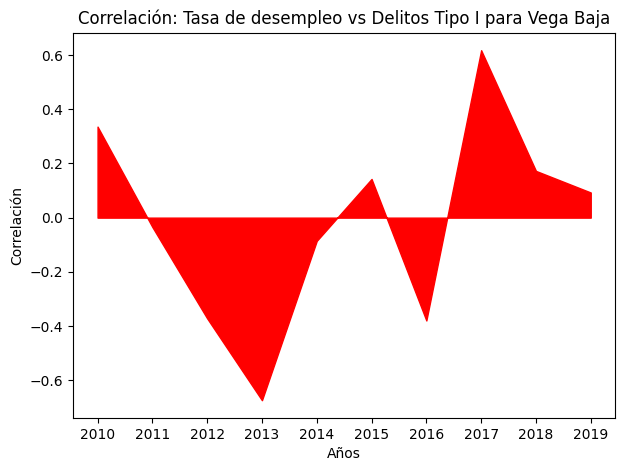

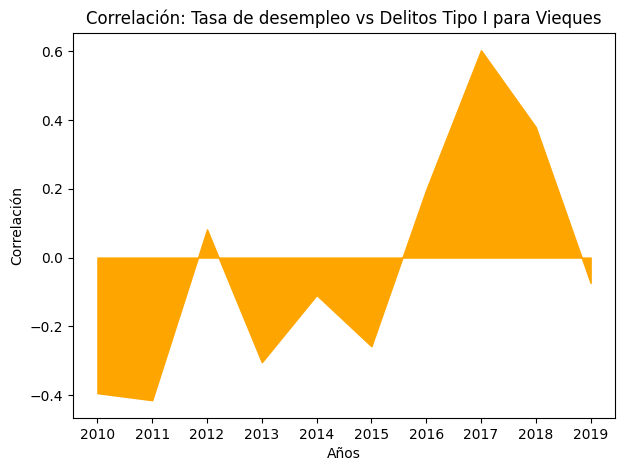

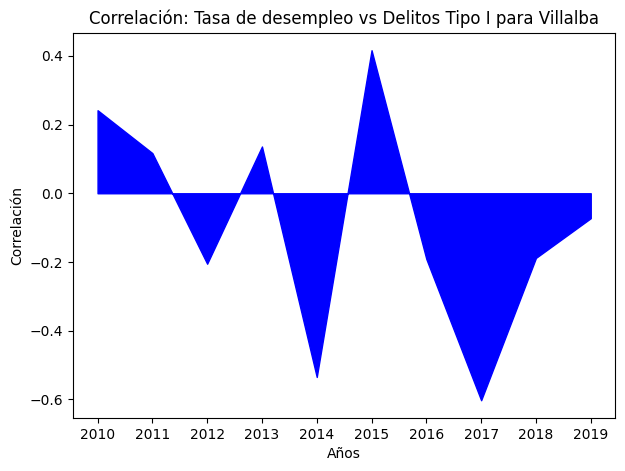

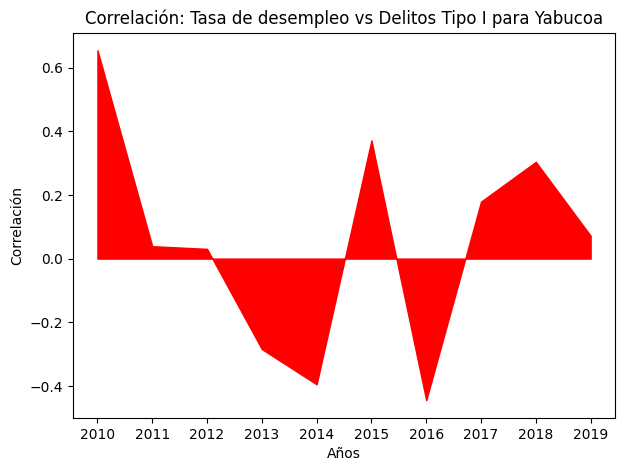

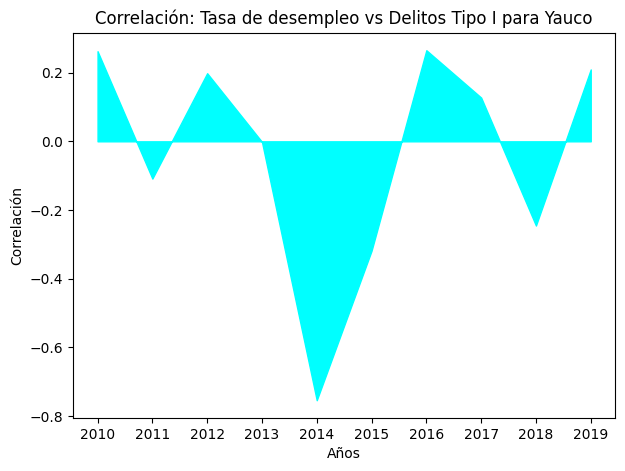

In [7]:
# Tengo que crear un for loop para sacar la correlacion entre delitos y desempleo por municipio anualmente desde el 2010 hasta el 2022
municipios = list(df['Municipio'].unique())
municipios.sort()
# municipios 

years = range(2010, 2020)

colors = ['red', 'green', 'blue', 'orange', 'cyan', 'magenta', 'yellow']

# Por cada municipio quiero una gráfica
for municipio in municipios:

    # Crea un df con el municipio 
    pueblo = df.loc[df['Municipio'] == municipio]

    correlaciones = []
    # Crea una correlación entre los tipo 1 y desempleo para esos muncipcios
    for year in years:
        time_slot = pueblo.loc[pueblo['Date'].dt.year == year]
        correlacion = time_slot[['Tipo I', 'Tasa de Desempleo']].corr().iloc[0::2, -1].reset_index()
        correlaciones.append(correlacion['Tasa de Desempleo'][0])

    # Bar chart
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)
    ax.stackplot(years,correlaciones, color=colors[np.random.randint(0,6)])

    ax.set_title(f'Correlación: Tasa de desempleo vs Delitos Tipo I para {municipio}')
    ax.set_xlabel('Años')
    ax.set_ylabel('Correlación')

    ax.set_xticks(years)
    plt.show()

### The above visuals suggest there are positive and negative correlation between employment rate and criminality, and the peaks change according to different periods of time. This could be due to natural disasters or other natural or political events during those periods as well as unemployment.

In [8]:
# Creating a scatter plot of delitos vs dasa de desempleos to further see the strength of correlation
import seaborn as sns

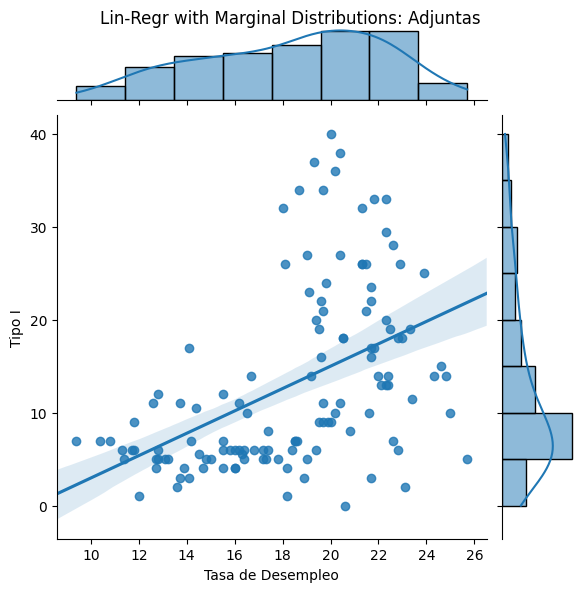

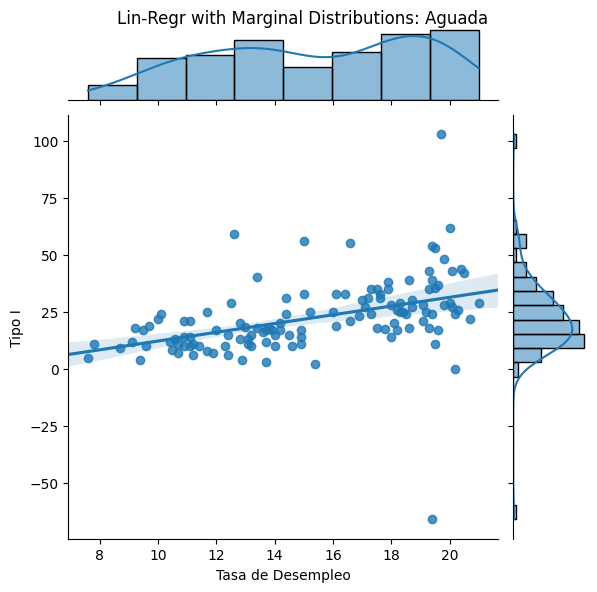

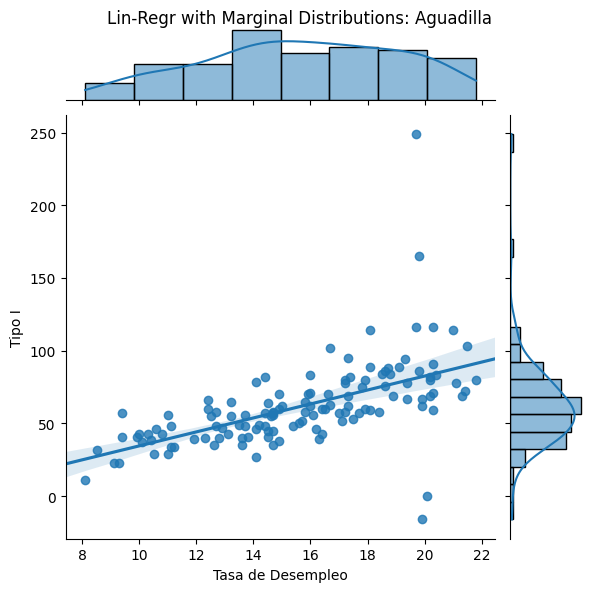

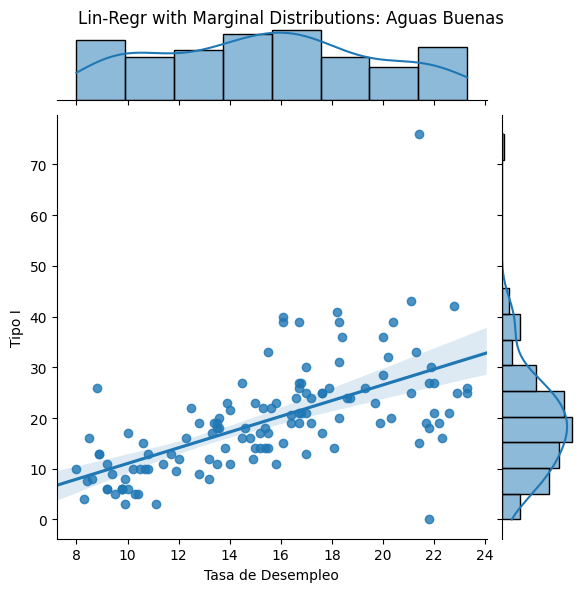

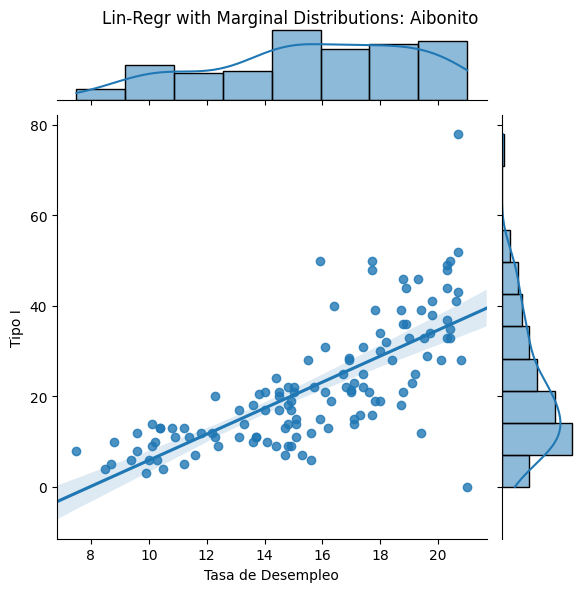

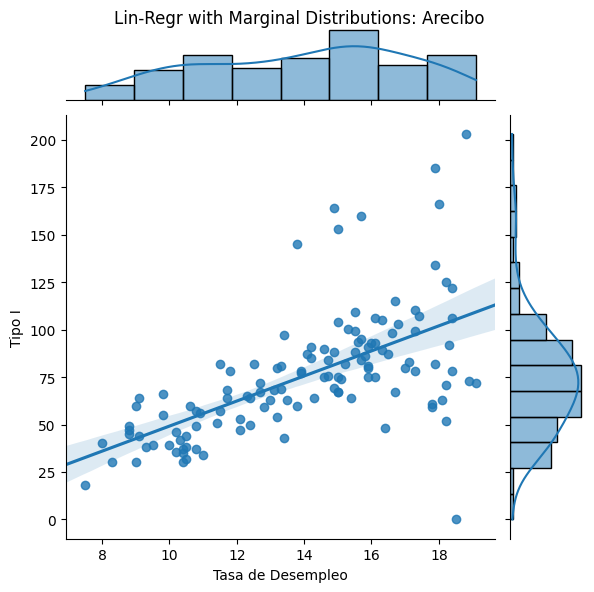

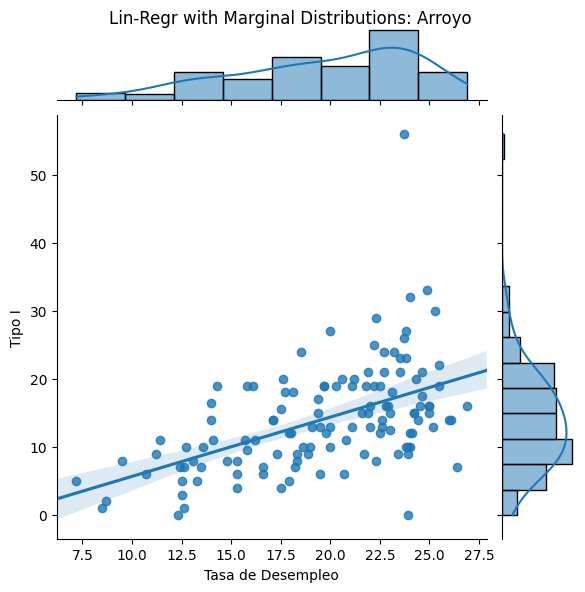

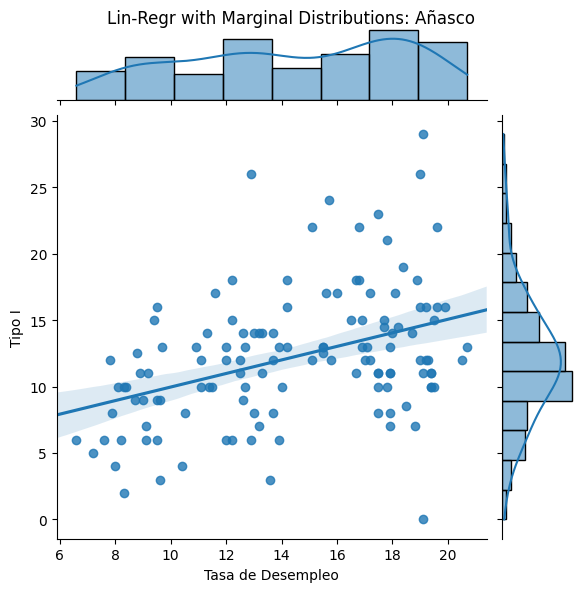

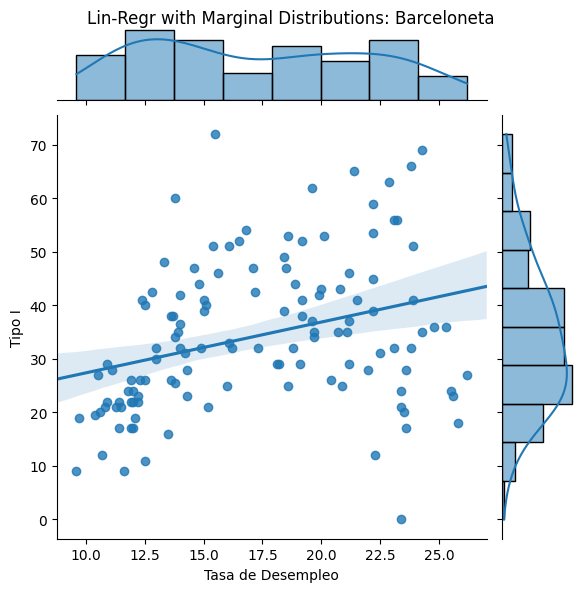

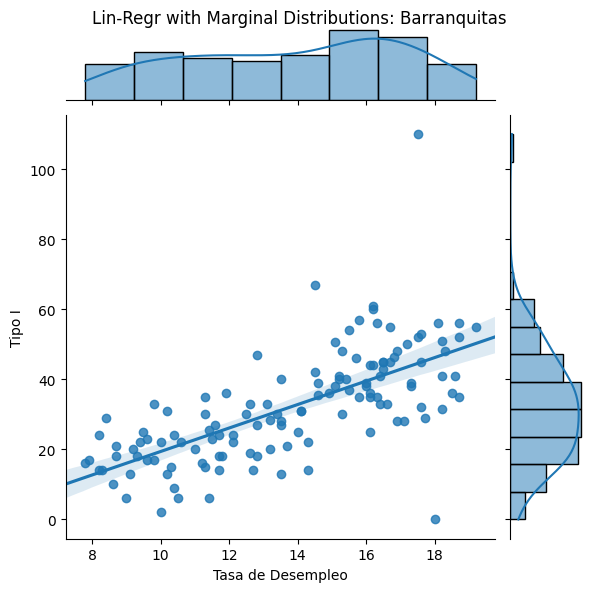

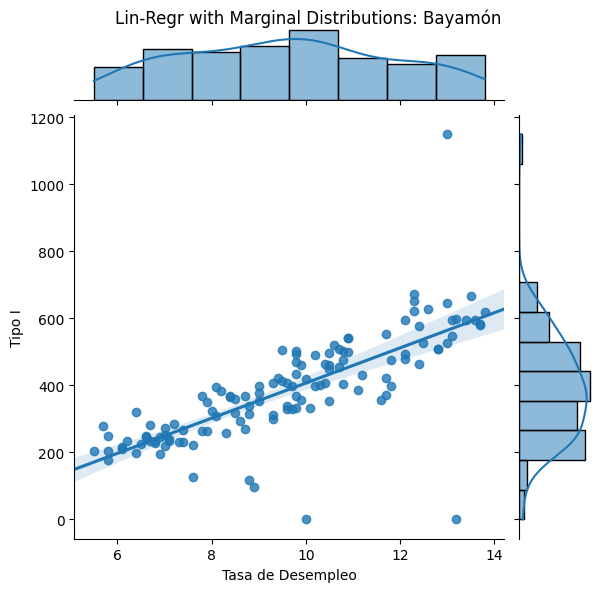

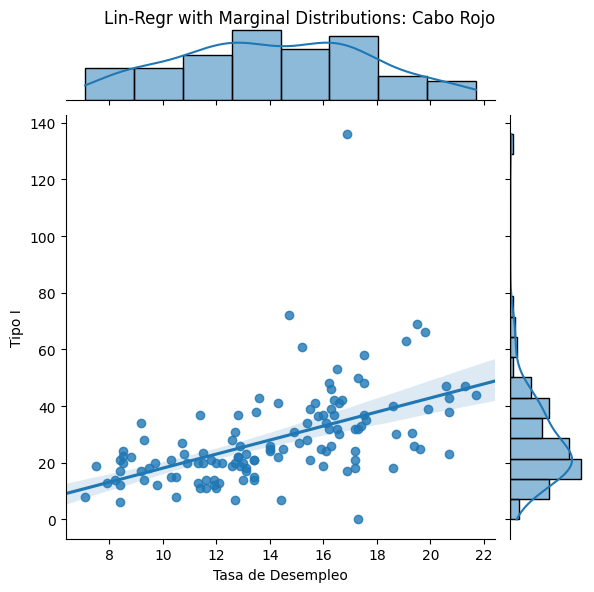

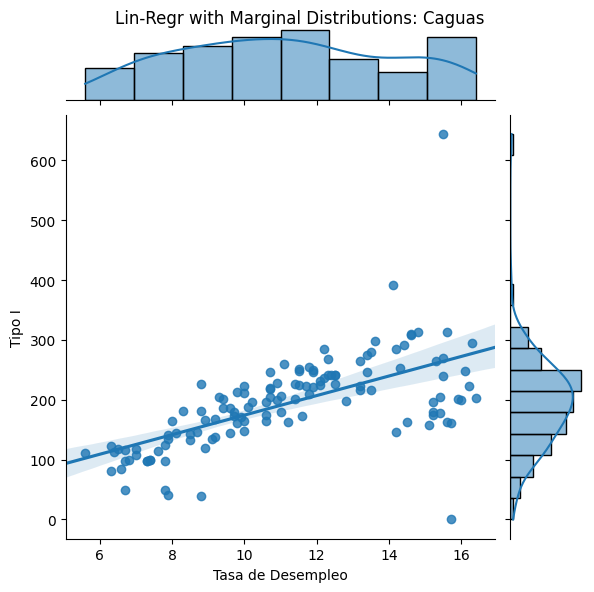

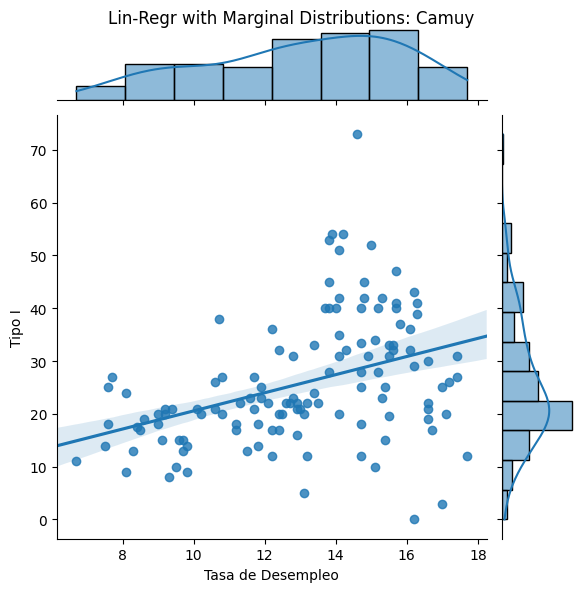

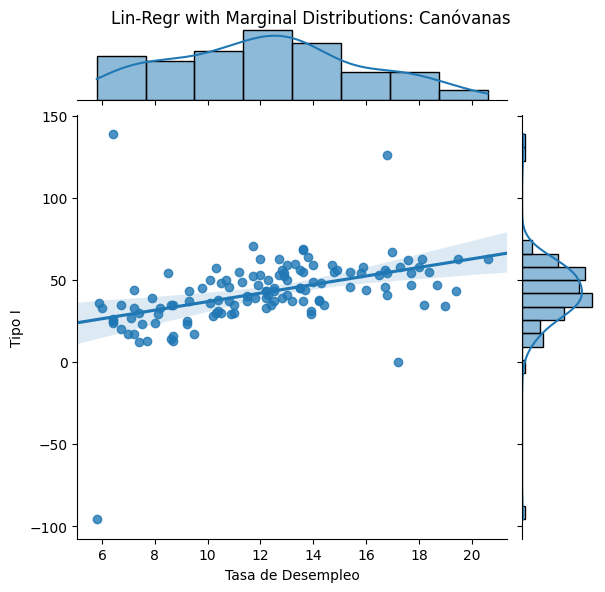

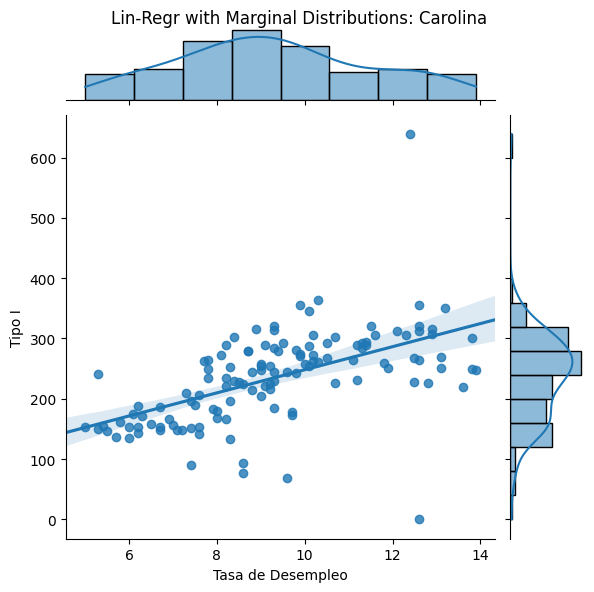

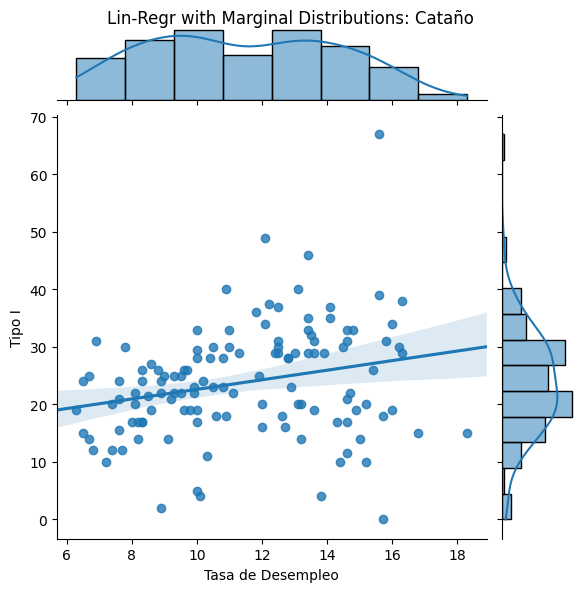

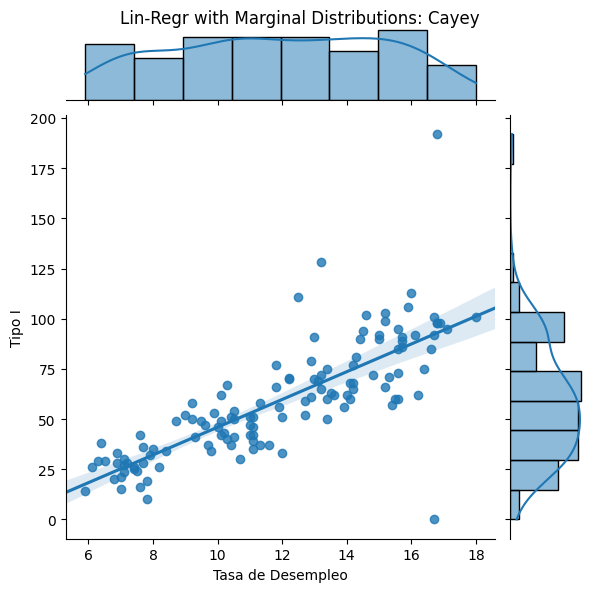

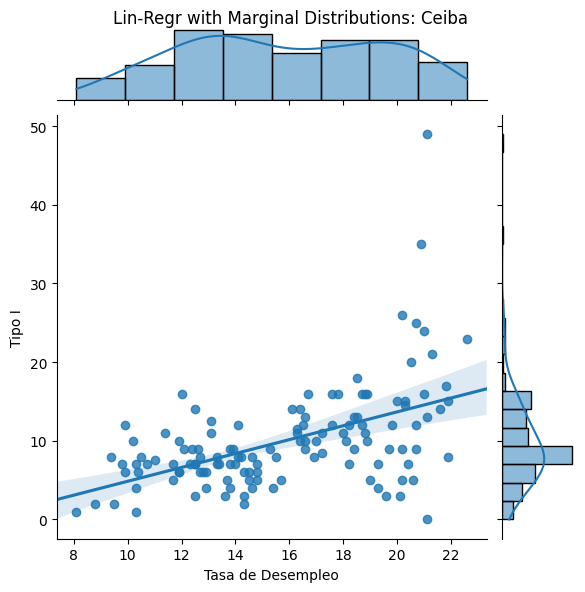

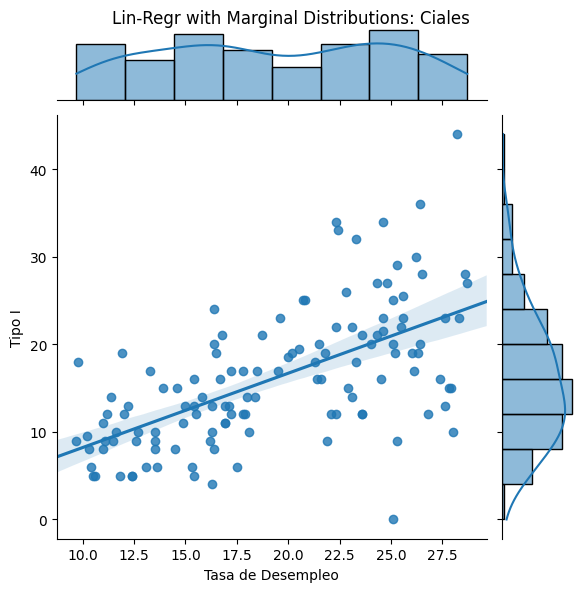

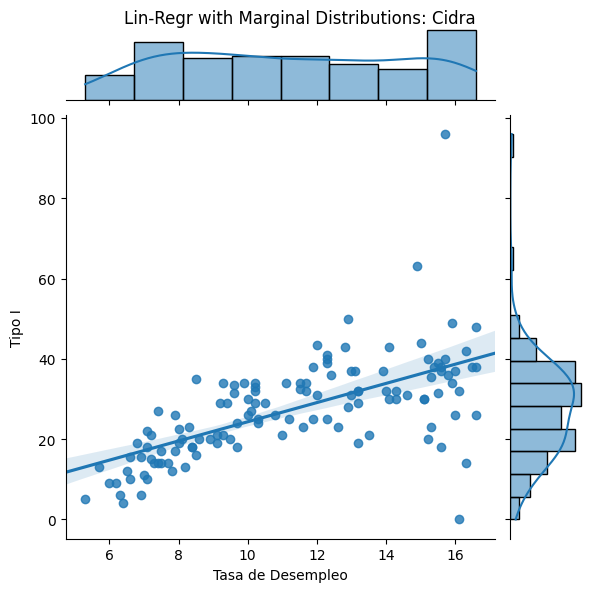

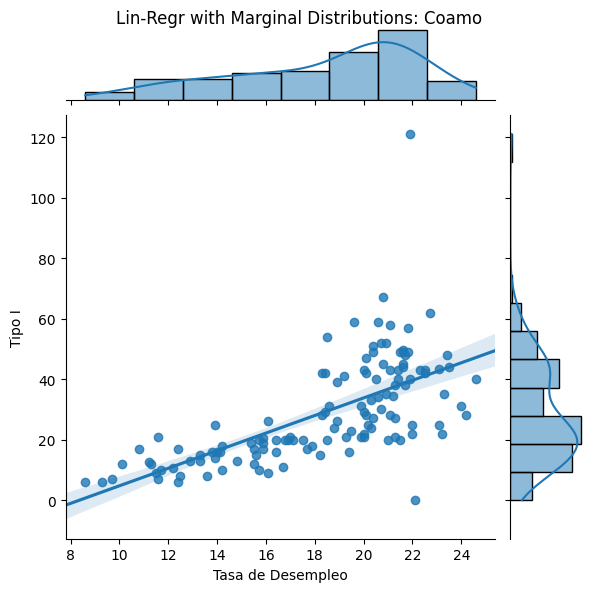

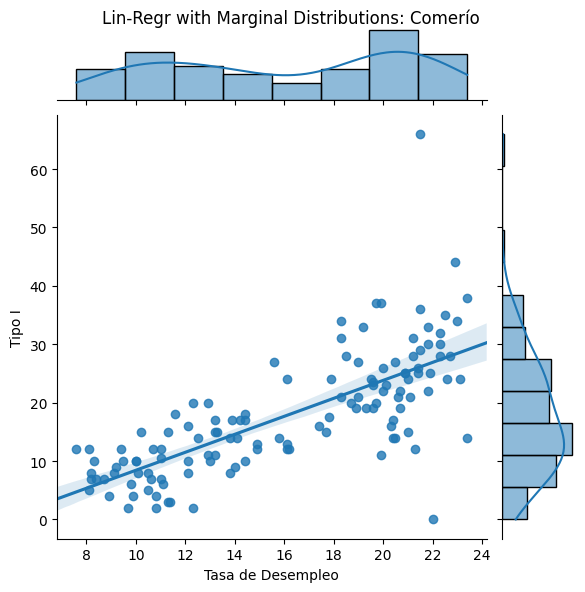

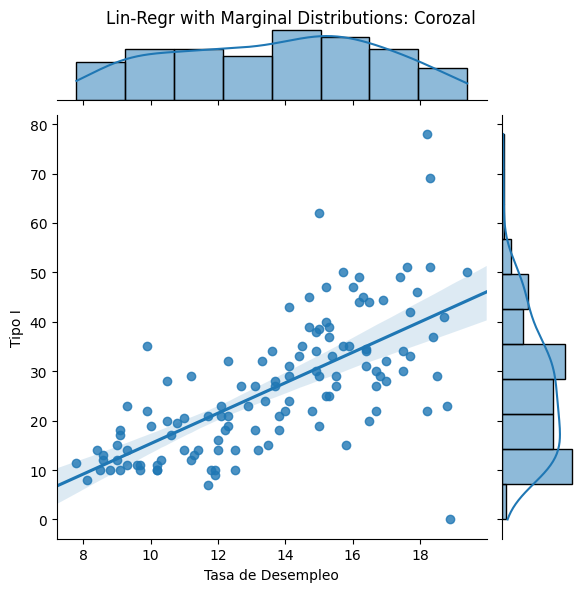

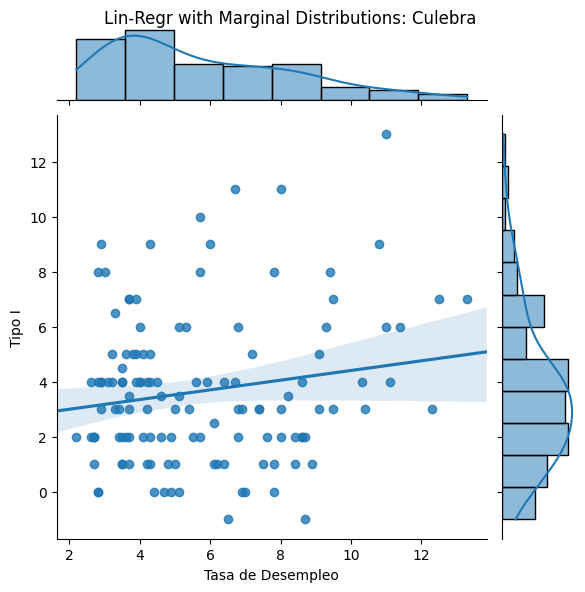

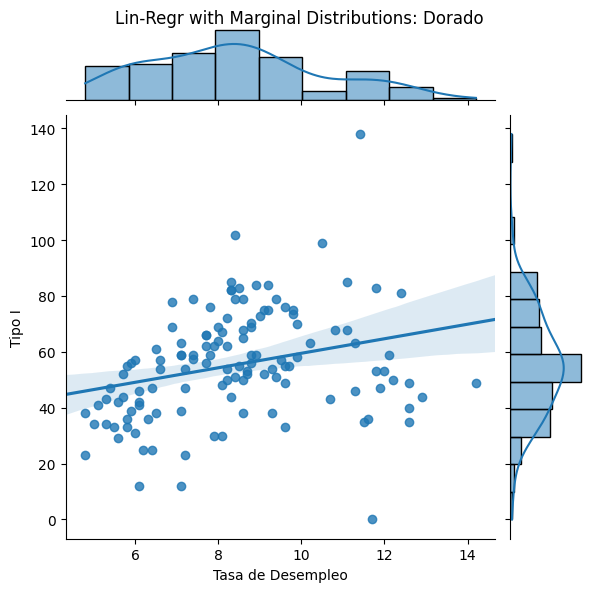

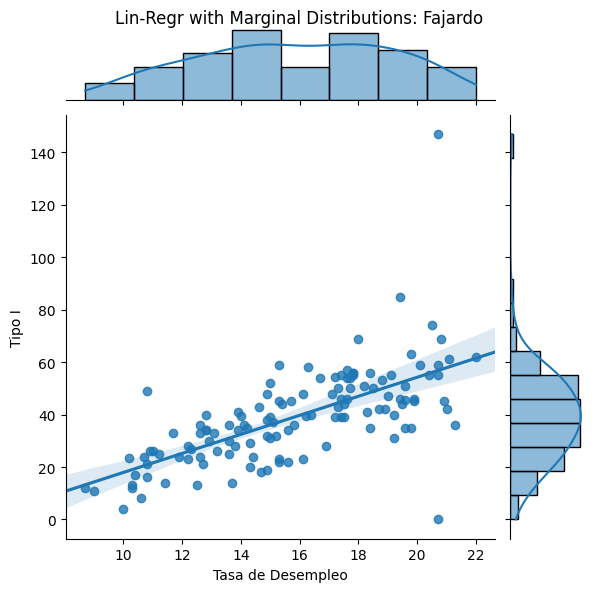

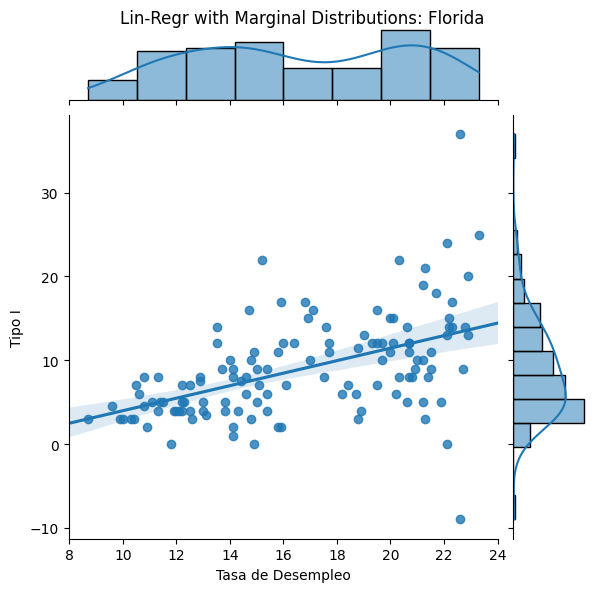

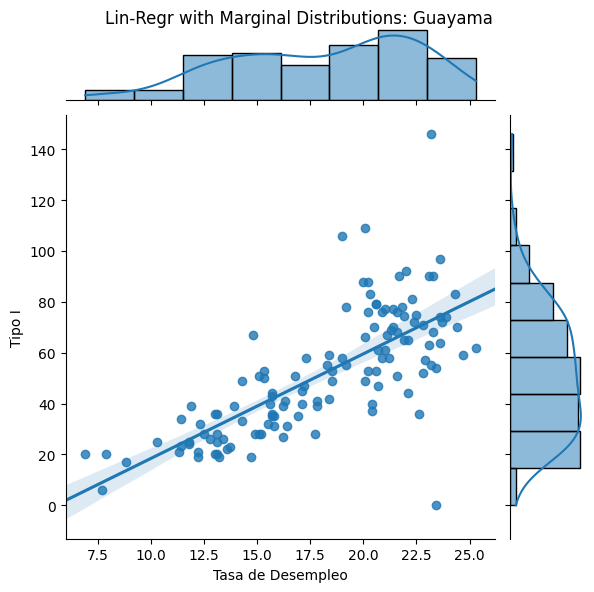

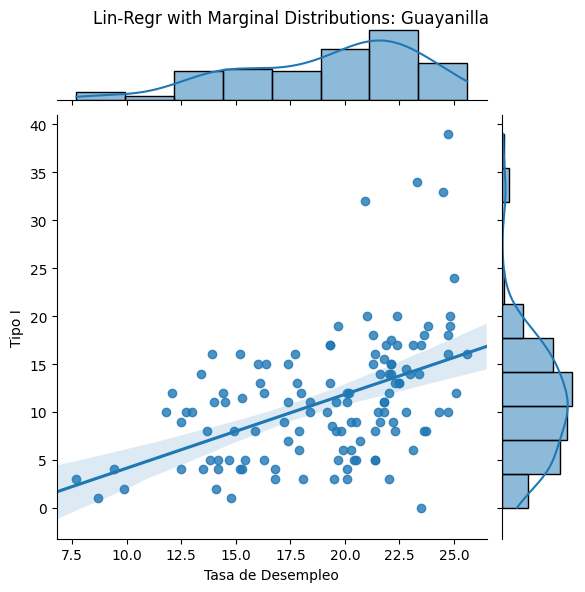

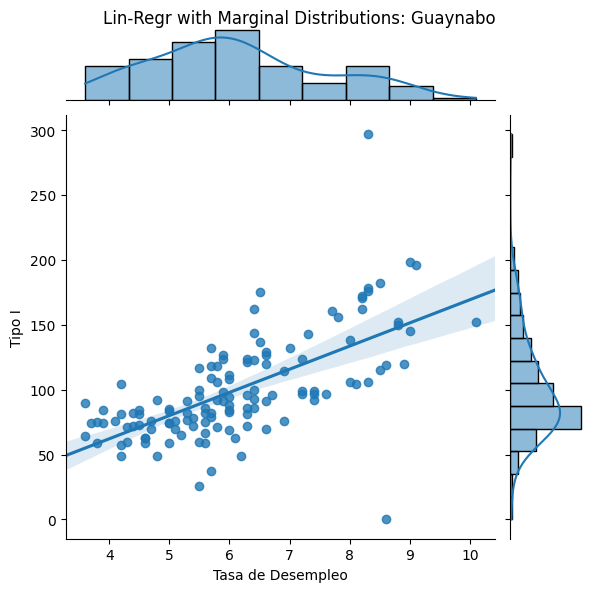

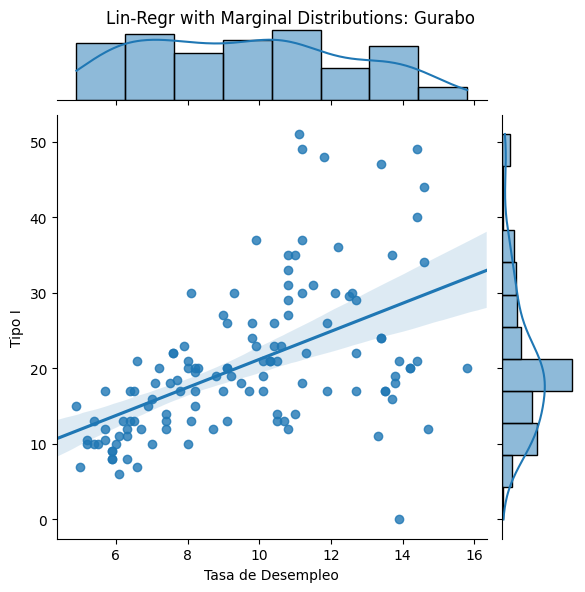

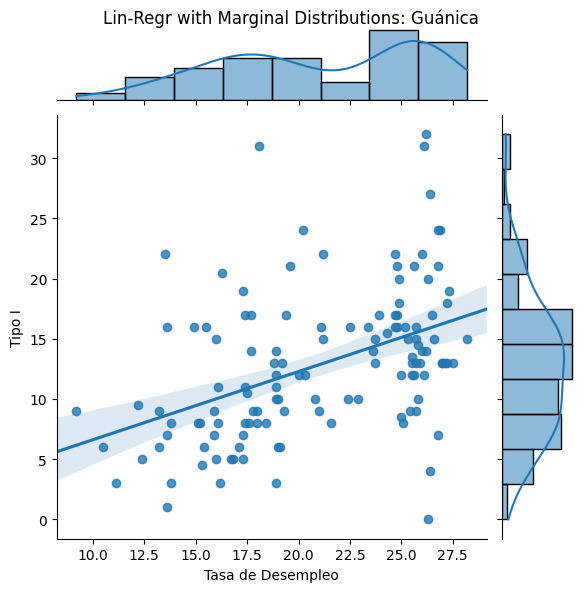

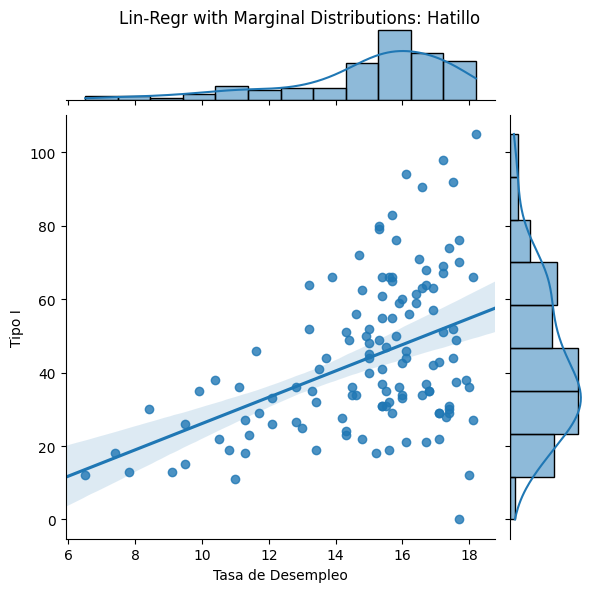

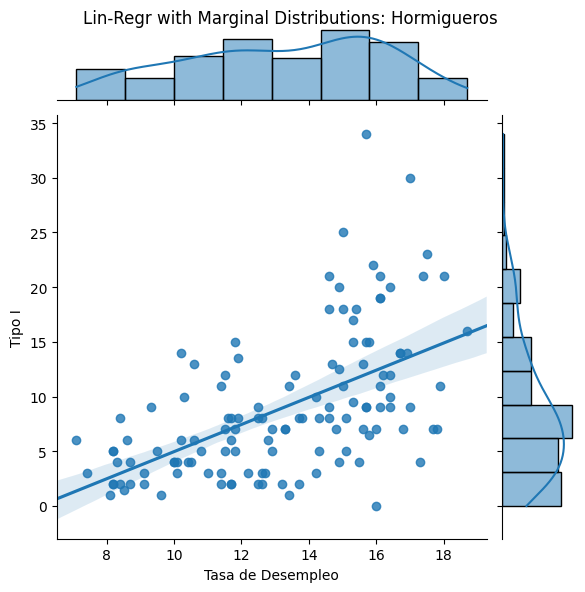

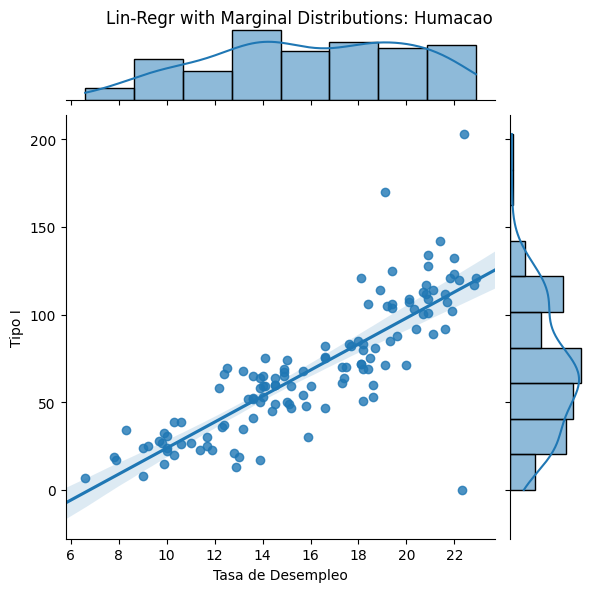

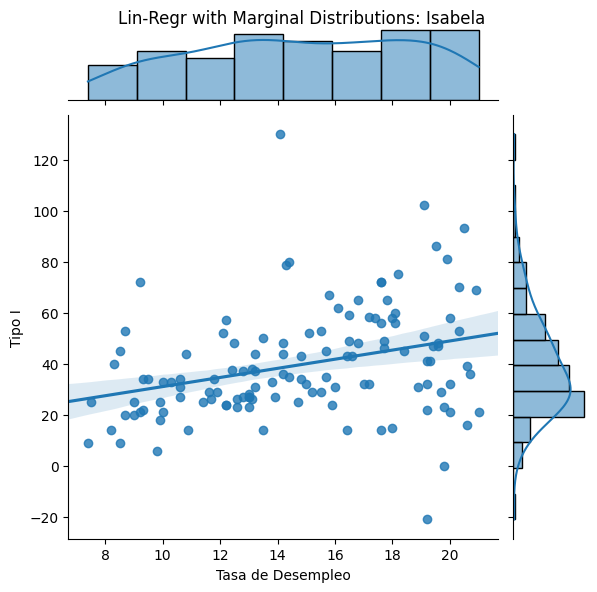

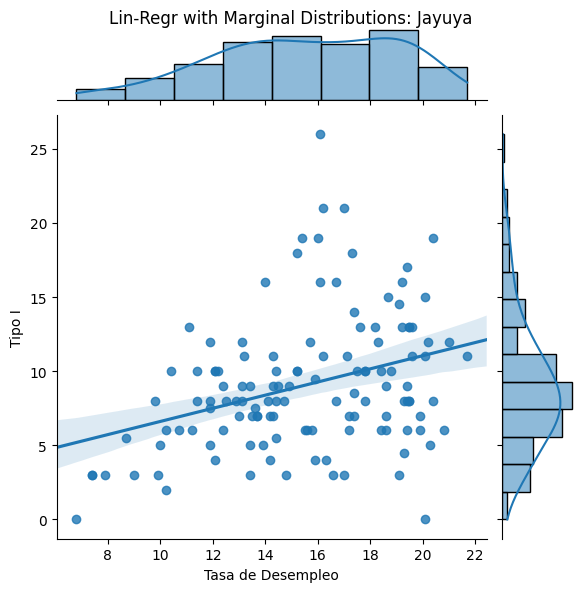

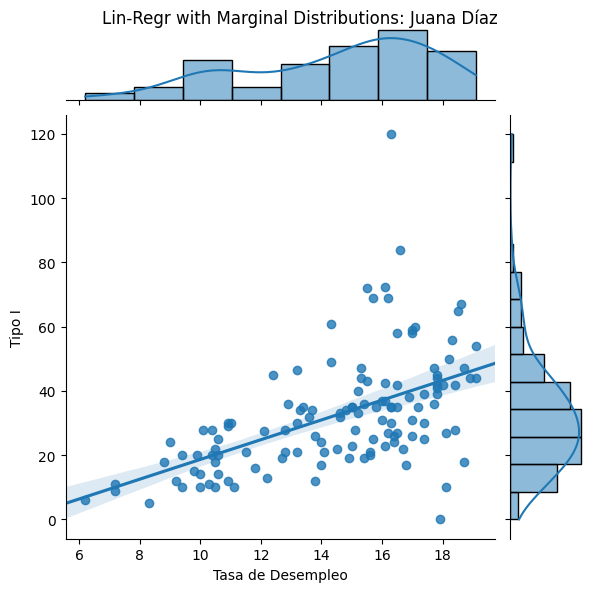

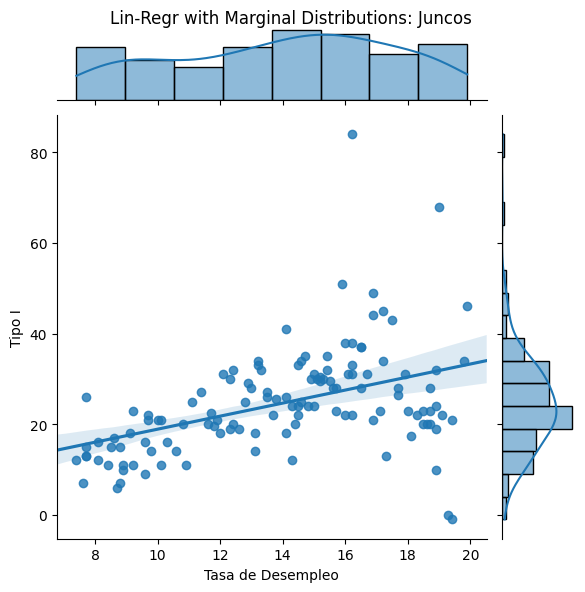

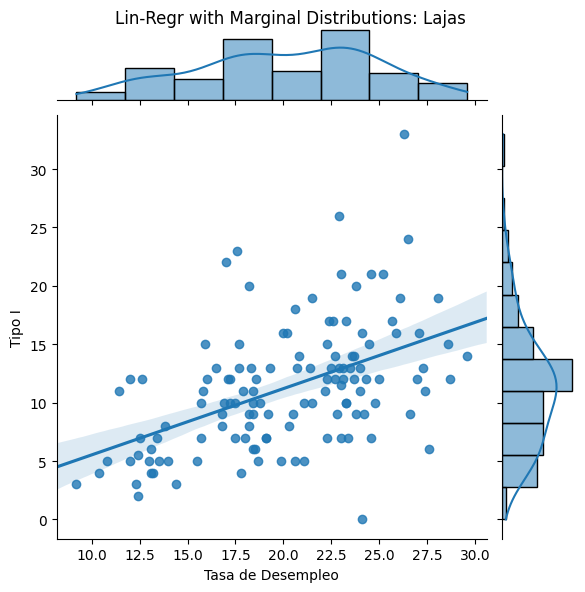

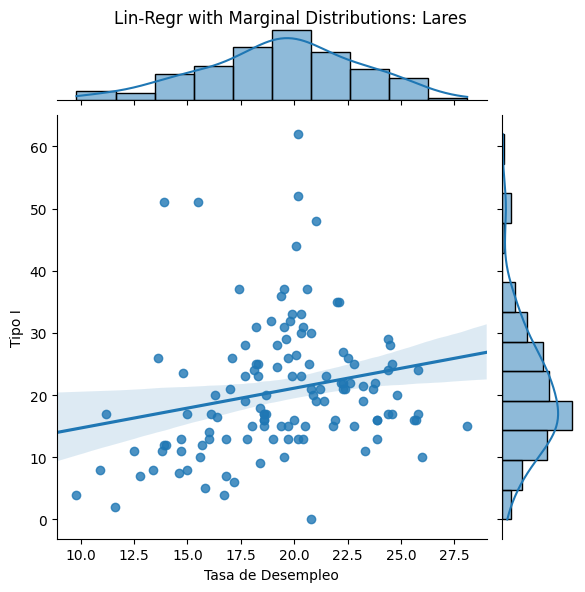

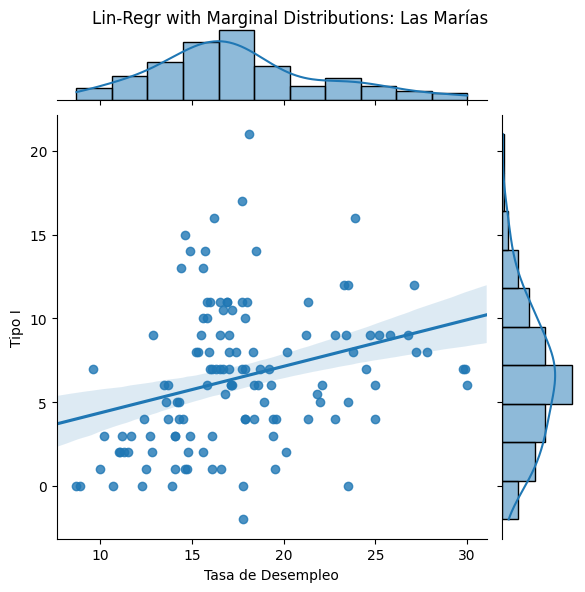

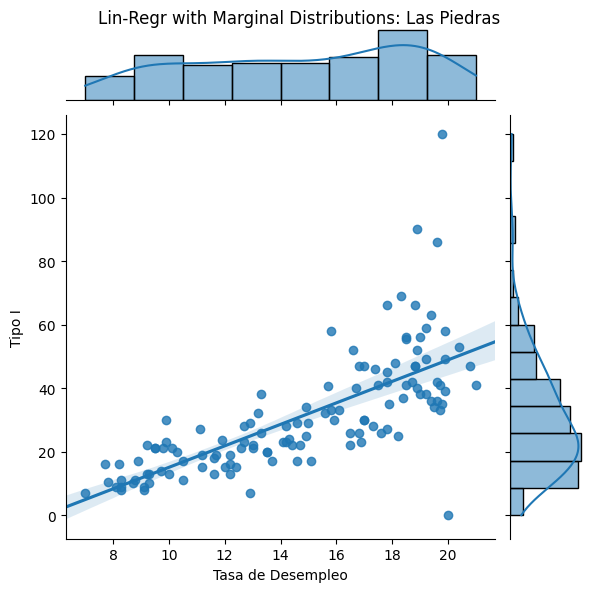

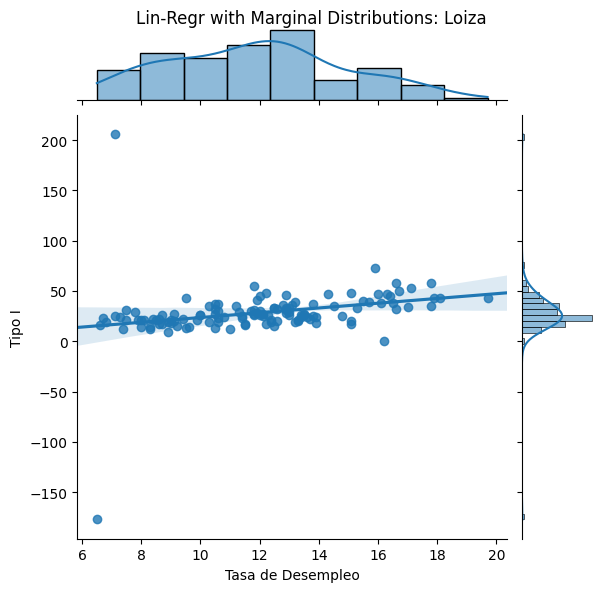

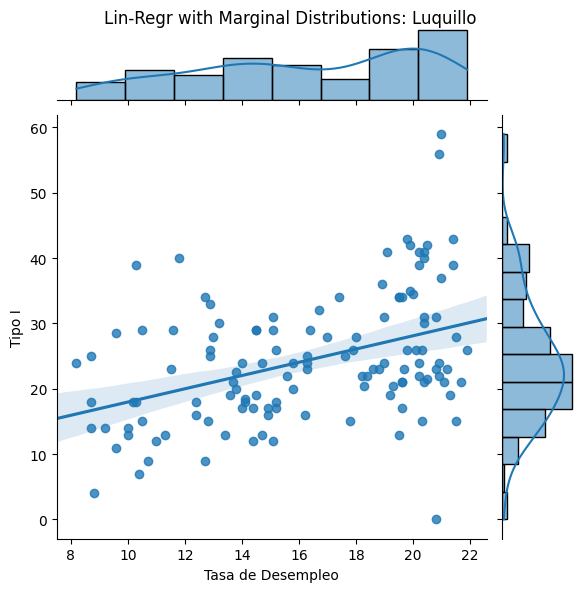

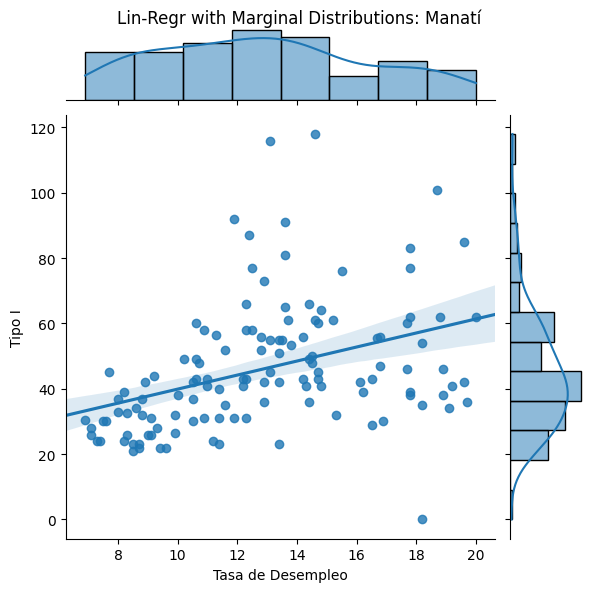

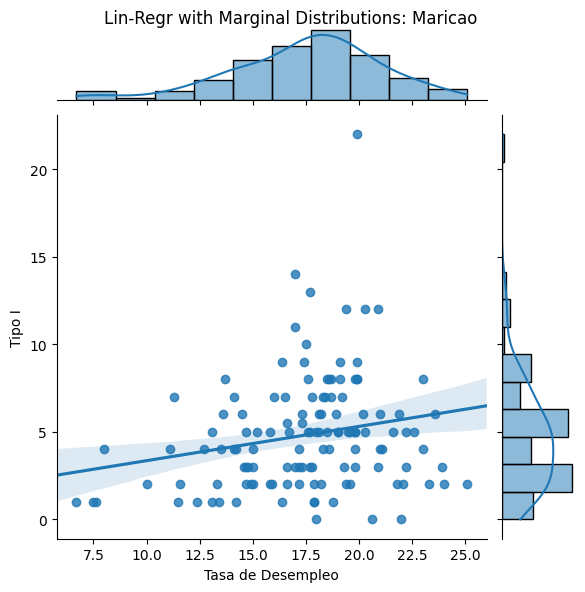

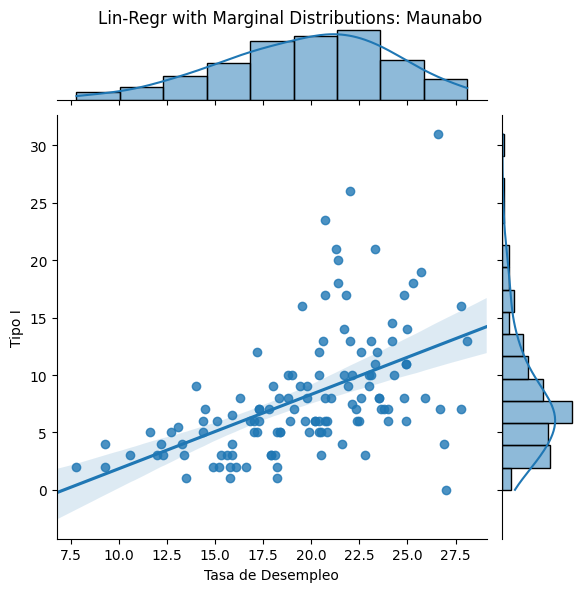

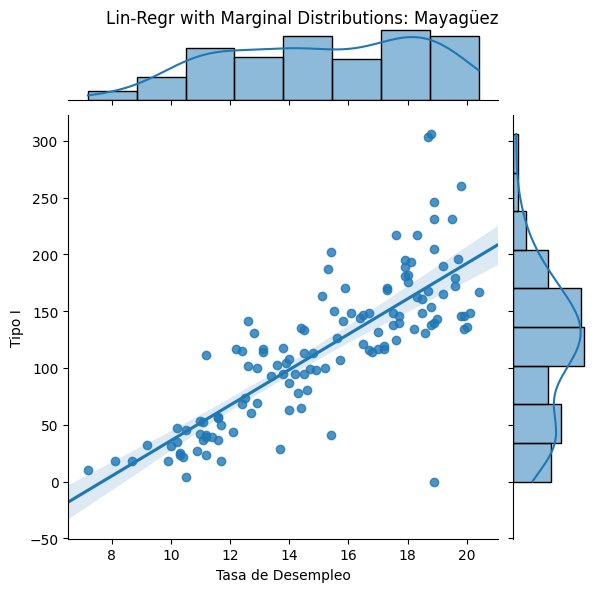

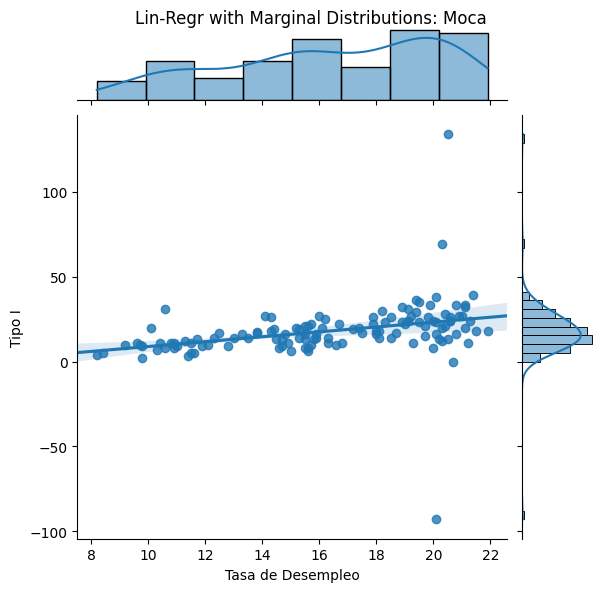

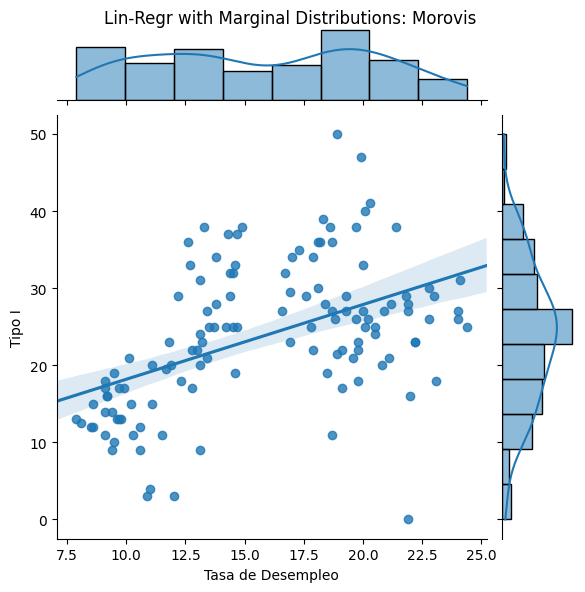

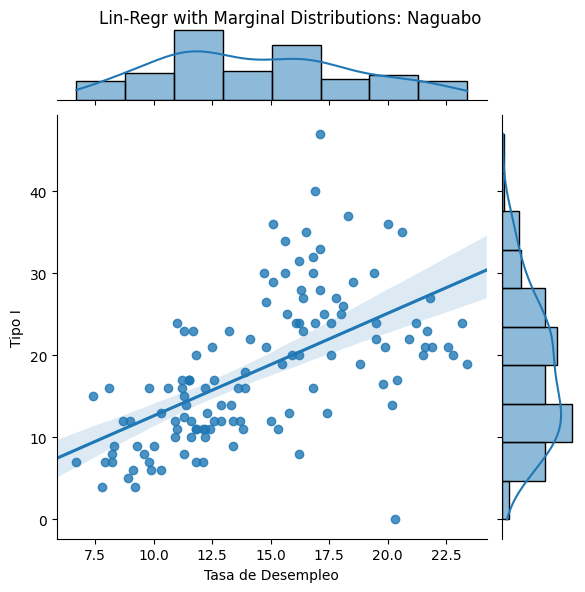

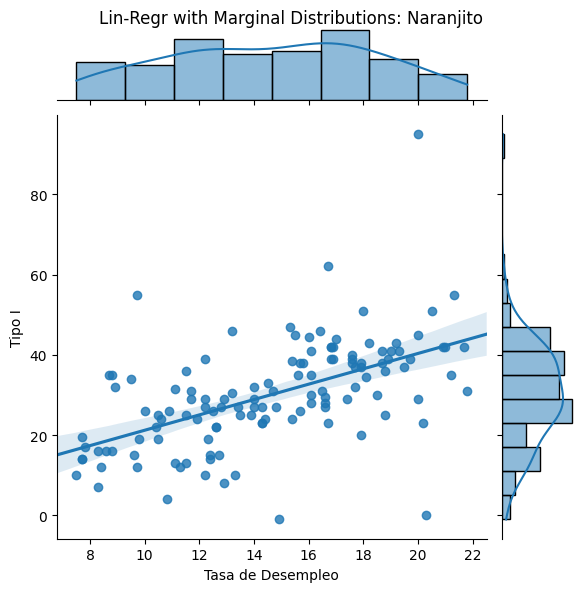

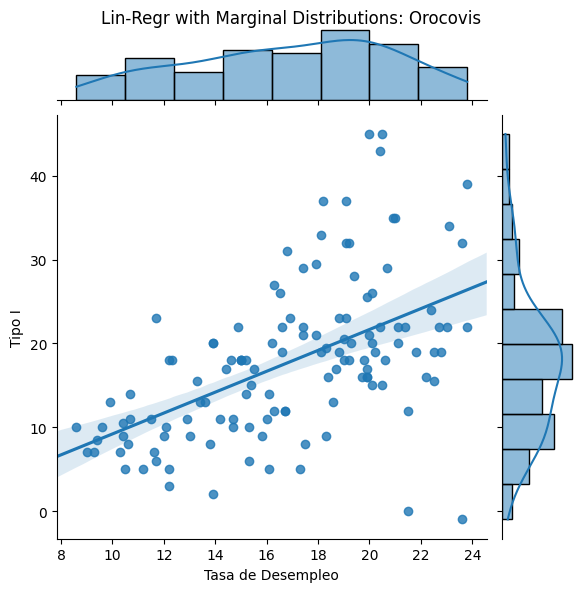

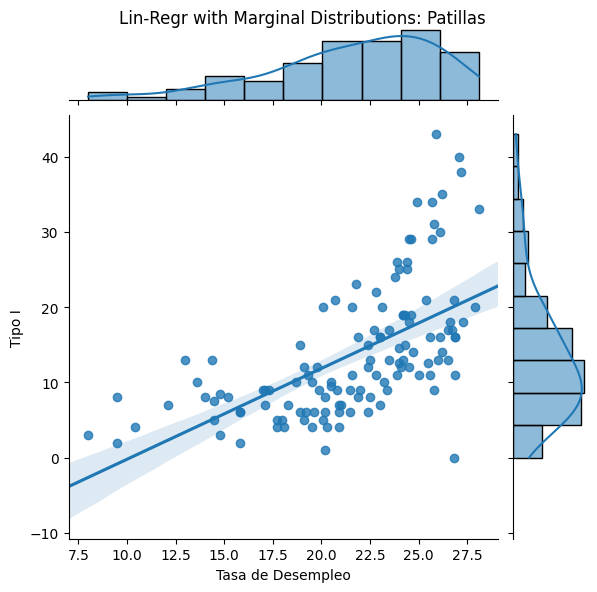

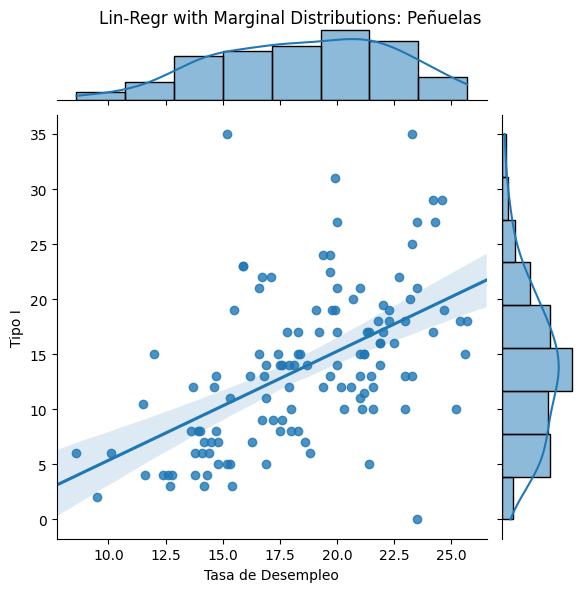

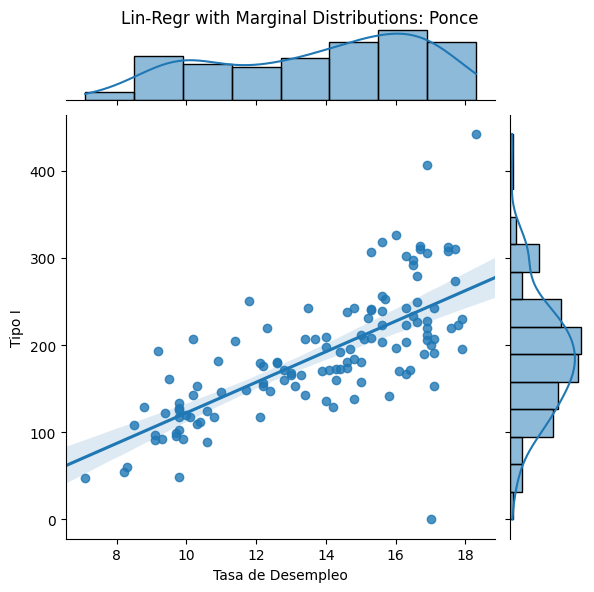

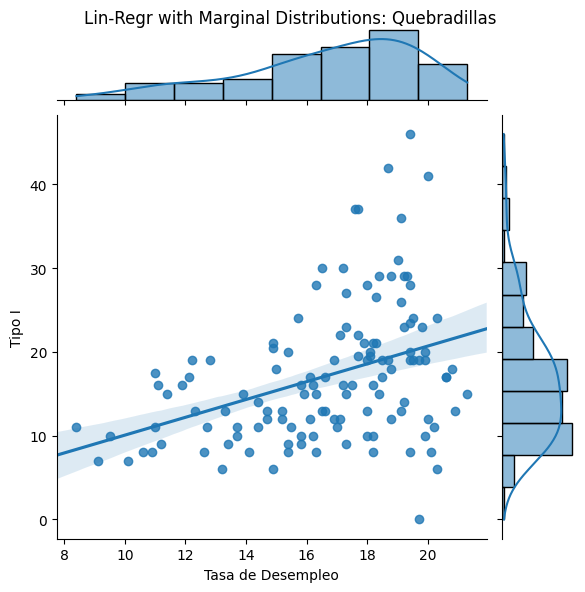

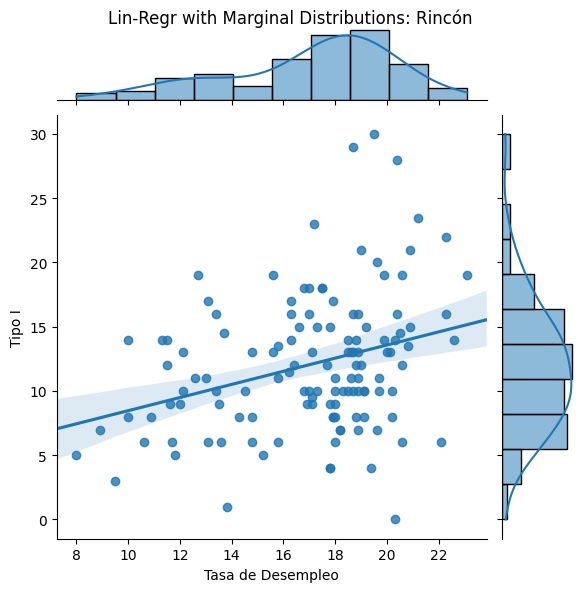

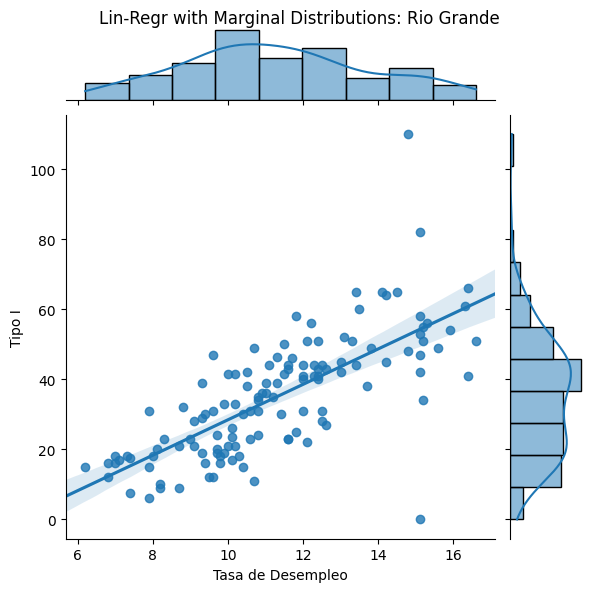

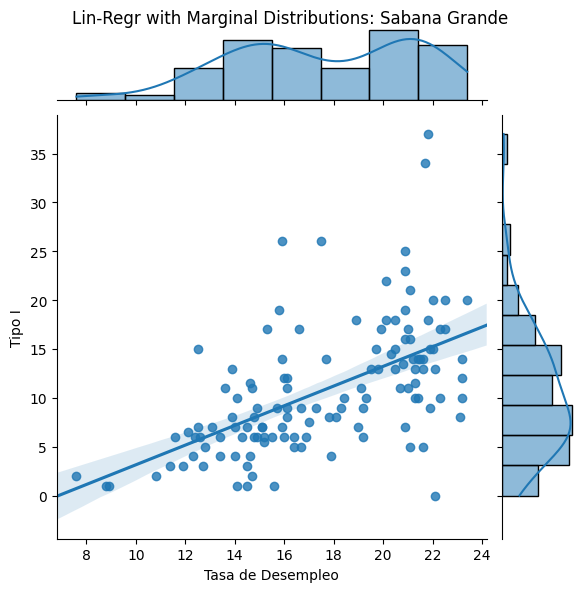

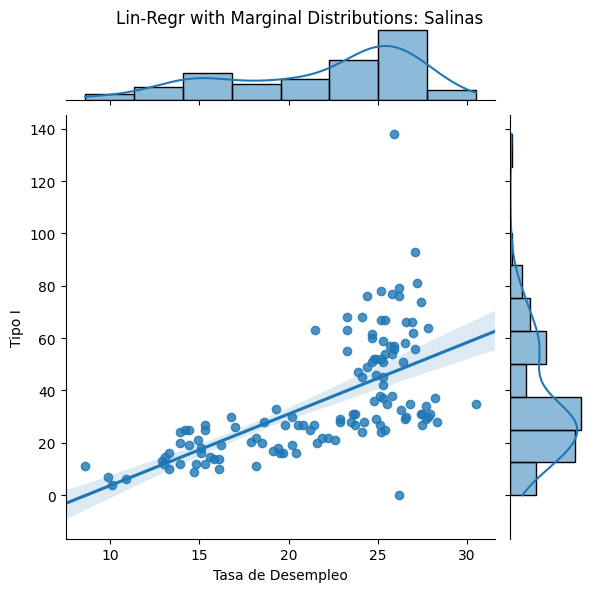

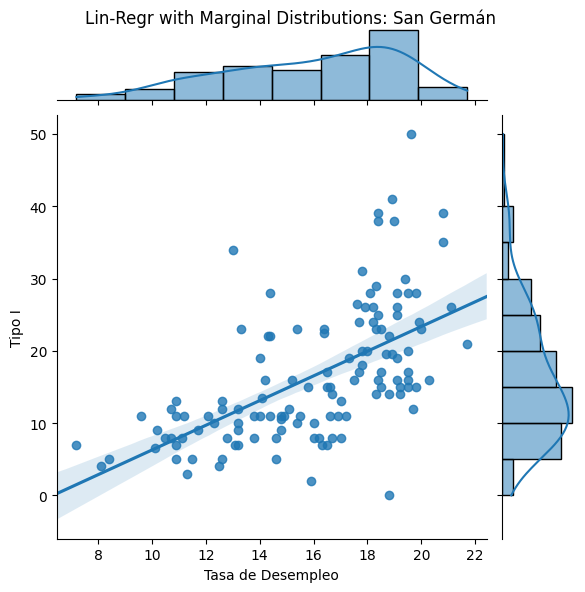

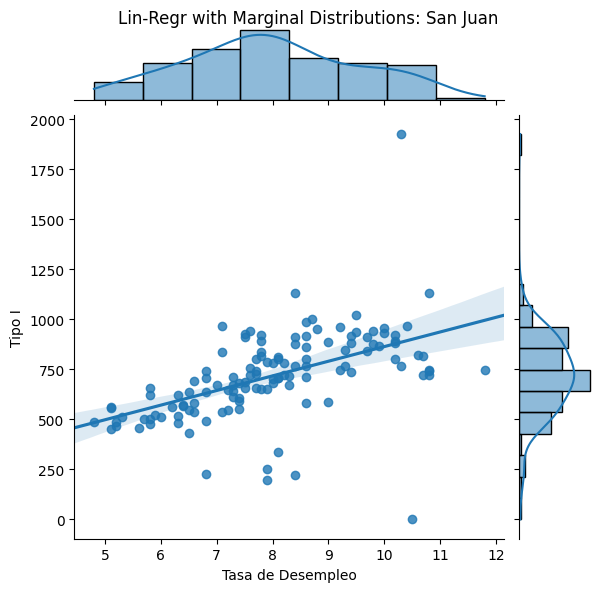

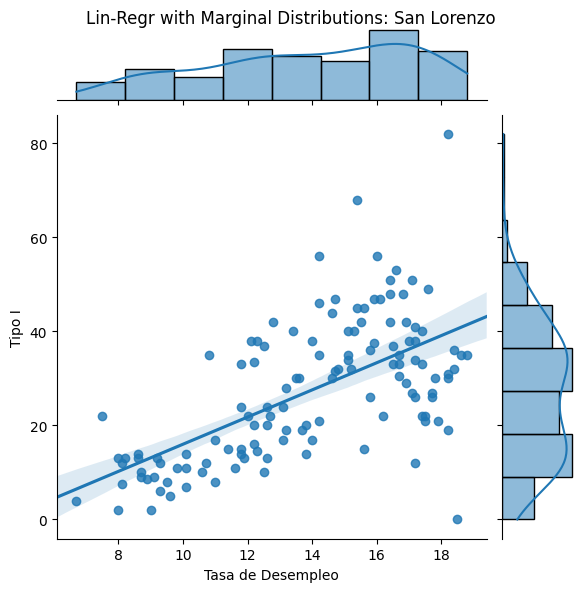

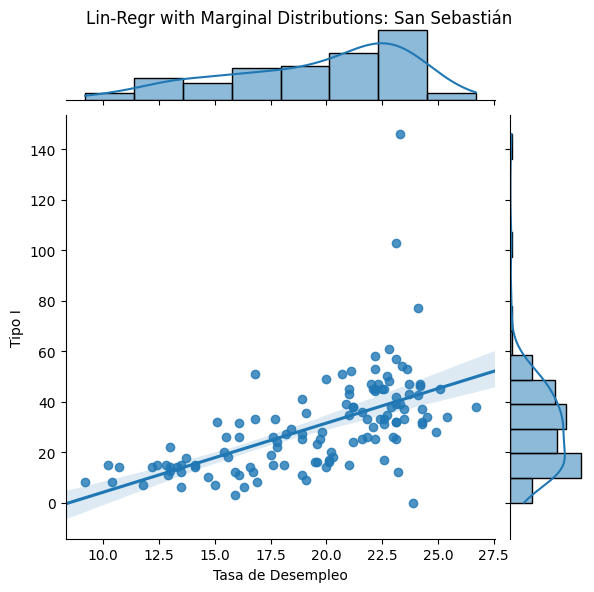

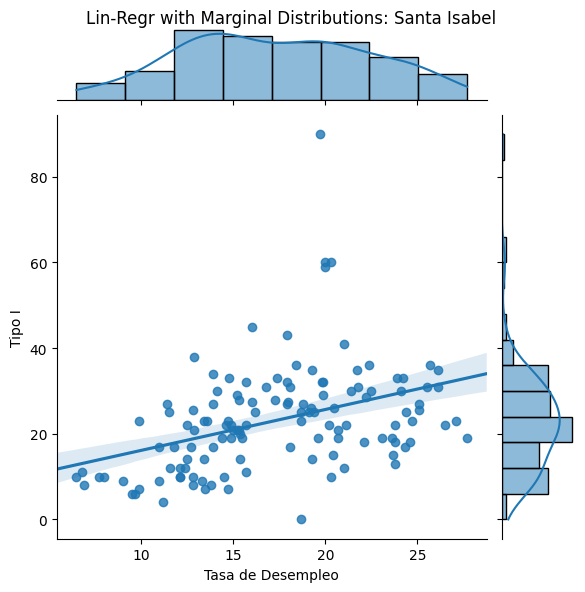

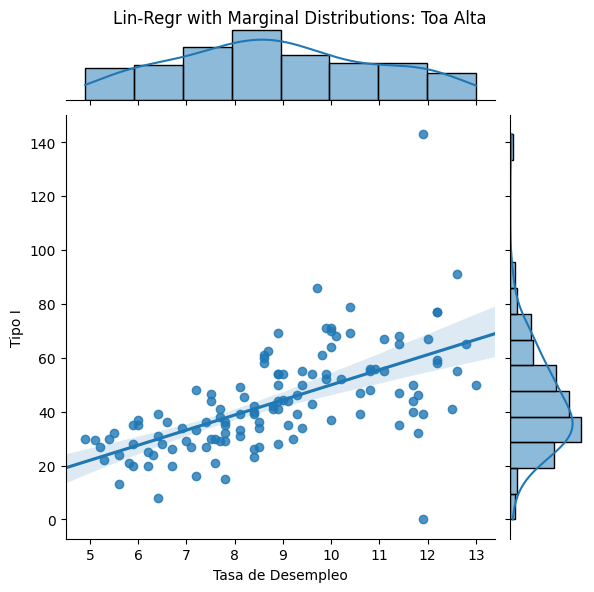

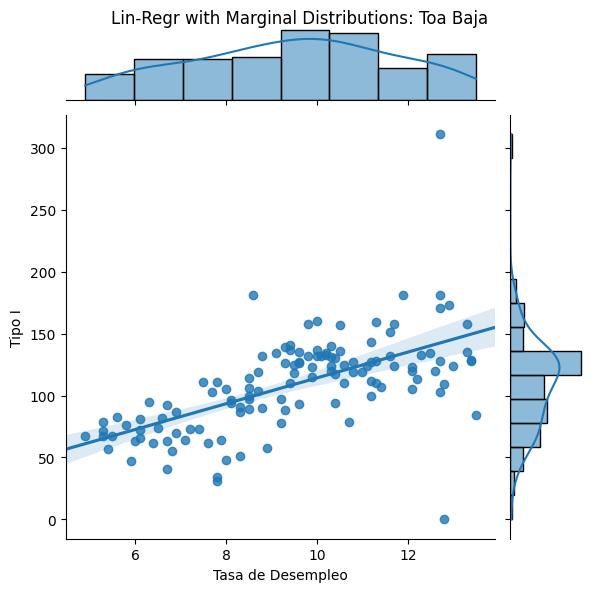

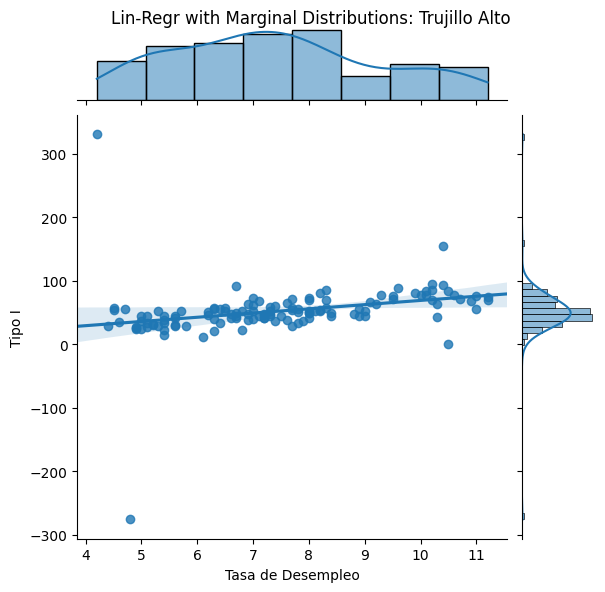

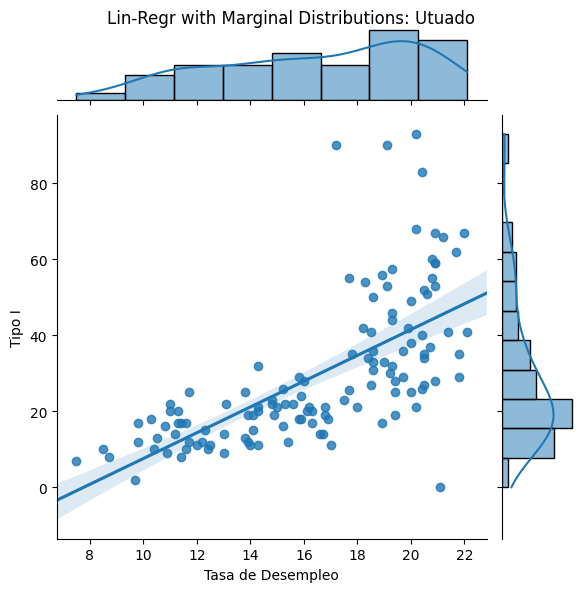

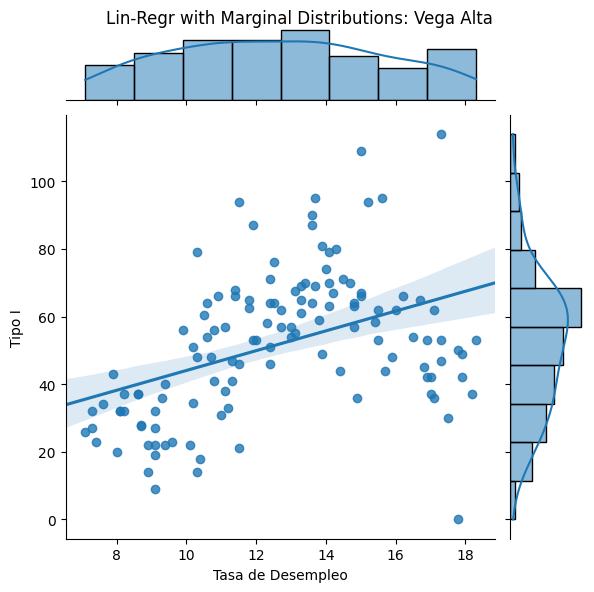

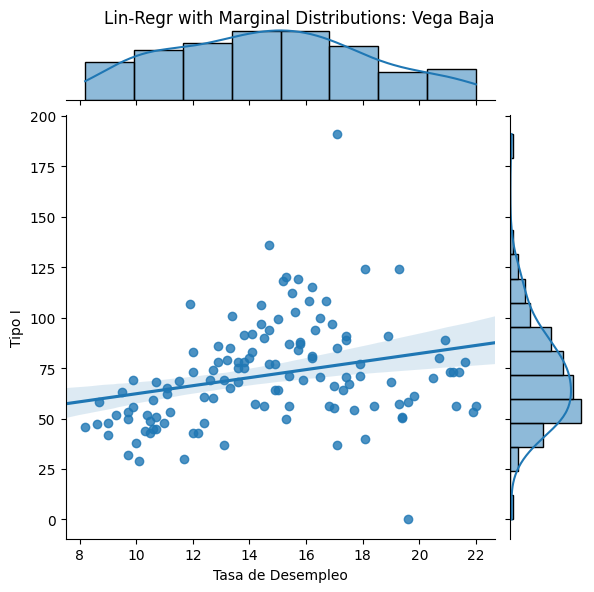

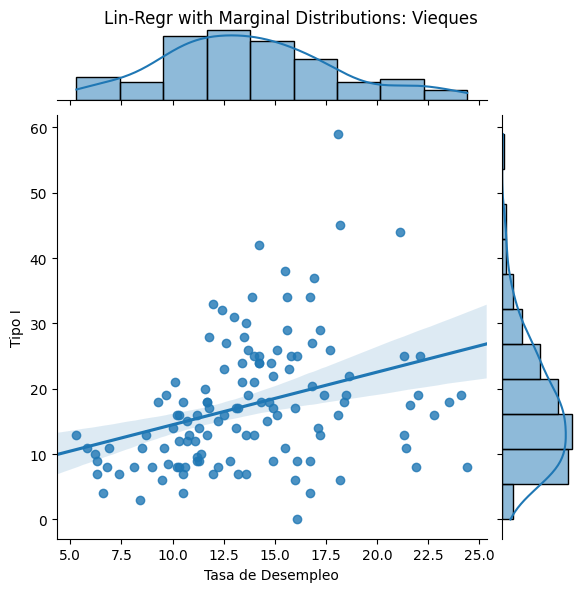

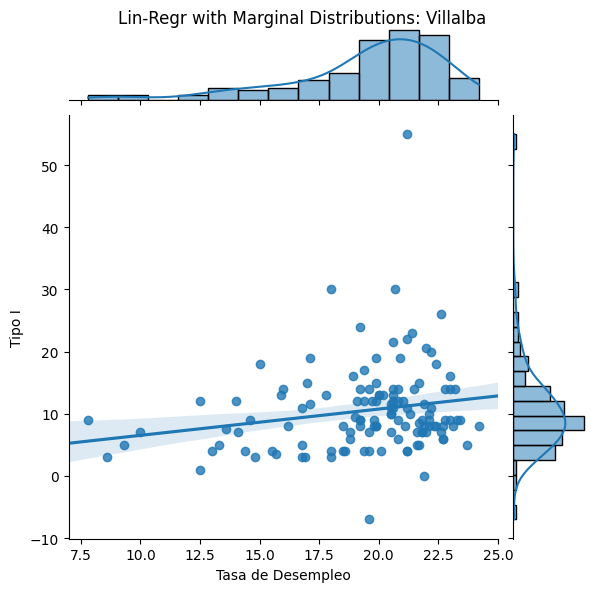

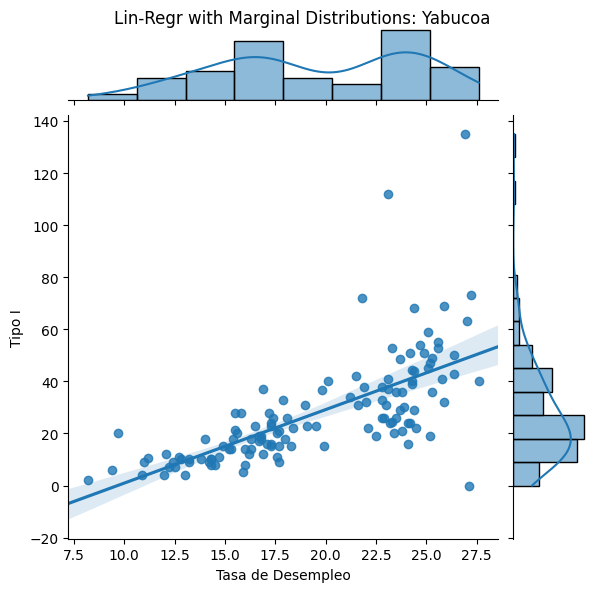

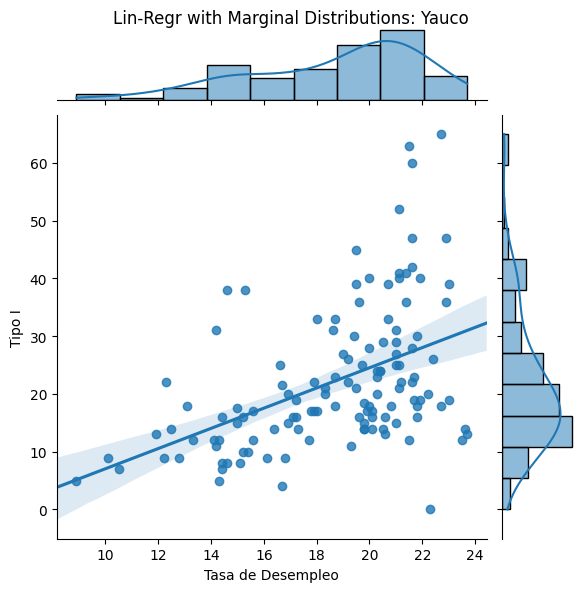

In [9]:
for municipio in municipios:
    
    
    g = sns.jointplot(data=df[df.Municipio == municipio],
                  x='Tasa de Desempleo', 
                  y='Tipo I',
                  kind="reg",
                 truncate=False,
                 )
    g.fig.suptitle("Lin-Regr with Marginal Distributions: " + municipio)
    g.fig.subplots_adjust(top=0.95)
    
    plt.show()

In [10]:
# normalizing the values in the dataframe to perform a
# more easy visualization

# def normalizer(x):
#     # Using min-max feature scaling
    
#     # First normalizing delitos
#     min_ = x['Tipo I'].min()
#     max_ = x['Tipo I'].max()
    
#     x['Tipo I Normalized'] = (x['Tipo I'] - min_)/(max_ - min_)
    
#     # Normalizing tasa de desempleos
    
#     min_ = x['Tasa de Desempleo'].min()
#     max_ = x['Tasa de Desempleo'].max()
    
#     x['Tasa de Desempleo Normalized'] = (x['Tasa de Desempleo'] - min_)/(max_ - min_)
    
    
#     return x



# df = df.groupby(['Municipio']).apply(normalizer)

In [11]:
# for municipio in municipios:
    
    
#     g = sns.jointplot(data=df[df.Municipio == municipio],
#                   x='Tasa de Desempleo Normalized', 
#                   y='Tipo I Normalized',
#                   kind="reg",
#                  truncate=False,
#                  )
#     g.fig.suptitle("Lin-Regr with Marginal Distributions: " + municipio)
#     g.fig.subplots_adjust(top=0.95)
    
#     plt.show()